##Bring in libraries and dataframes and set indexes

In [34]:
plt.rcParams['font.family'] = 'fantasy'
plt.rcParams['legend.frameon'] = False

In [35]:
#Read in data calibrated VWC and PAW data
Data = pd.read_pickle('.\DataFrames\LysoVWC_df')
Data.columns = Data.columns.swaplevel('Column','Block') #get index in the right order for graphing

#Read in calibration coefficients calculated in C:\GitHubRepos\StonySoilLysimeters\Calibration\CS650Calibration.ipynb
SensorCoefficients = pd.read_pickle('.\Calibration\CS650Calibration.pkl')


#Bring in index for horizion types
HorizonIndex=pd.read_csv('.\IndexFiles\HorizonIndex.csv', #specify file path for data to read in
                         index_col = 0, #Use the first column, which is Date, as an index
                         na_values = 'NAN')

DrainageMask = pd.read_pickle('.\Dataframes\DrainageMask')
Drainage = pd.read_pickle('.\Dataframes\Drainage')
MetData= pd.read_csv('ETData.txt',index_col=0)
MetData.index = MetData.index.to_datetime()

YieldData = pd.read_csv('WheatYield.csv')
NConcData = pd.read_pickle('NConcData.pkl')
NConcData.index = NConcData.index.to_datetime()
NConcData.index = NConcData.index.normalize()

In [36]:
Data.where(Data<0.5,np.nan,inplace=True)

In [37]:
YieldData.set_index(['Stones','Gravels'],inplace=True,drop=False)
YieldData['TotalDM'] = np.add(YieldData['Yield'],YieldData['StrawDM'])
YieldData['TotalN'] = np.add(YieldData['GrainN'],YieldData['StrawN'])
YieldData

Stones  Gravels  Block      Yield    StrawDM  \
Stones    Gravels                                                    
StoneFree Deep     StoneFree     Deep      1   8.395974  13.736038   
          Shallow  StoneFree  Shallow      1   7.584622  13.893201   
Stony     Deep         Stony     Deep      1   8.341809  12.033642   
          Shallow      Stony  Shallow      1   7.854528  11.308914   
VeryStony Deep     VeryStony     Deep      1   9.279547  12.150780   
          Shallow  VeryStony  Shallow      1   7.976572  10.967351   
StoneFree Deep     StoneFree     Deep      2   8.747702  13.740732   
          Shallow  StoneFree  Shallow      2   9.115156  13.350069   
Stony     Deep         Stony     Deep      2   6.717167   9.644639   
          Shallow      Stony  Shallow      2   8.609651  11.320226   
VeryStony Deep     VeryStony     Deep      2  10.623752  13.111258   
          Shallow  VeryStony  Shallow      2   9.814346  12.679392   
StoneFree Deep     StoneFree     Deep      3   6.187246  13.821041   
          Shallow  StoneFree  Shallow      3   7.630420  12.280418   
Stony     Deep         Stony     Deep      3   7.259906  12.107175   
          Shallow      Stony  Shallow      3   7.918730  12.578961   
VeryStony Deep     VeryStony     Deep      3   6.117442  10.309084   
          Shallow  VeryStony  Shallow      3   8.824458  11.457658   
StoneFree Deep     StoneFree     Deep      4   7.988813  12.239177   
          Shallow  StoneFree  Shallow      4   6.425920  12.888842   
Stony     Deep         Stony     Deep      4   7.717273  13.136189   
          Shallow      Stony  Shallow      4  10.335648  13.537168   
VeryStony Deep     VeryStony     Deep      4   8.641254  12.550712   
          Shallow  VeryStony  Shallow      4   8.802233  13.595259   

                       GrainN      StrawN    TotalDM      TotalN  
Stones    Gravels                                                 
StoneFree Deep     192.267809  112.058600  22.132012  304.326410  
          Shallow  155.181369   67.854395  21.477823  223.035764  
Stony     Deep     176.095584   63.585762  20.375450  239.681346  
          Shallow  168.793815   65.885731  19.163442  234.679546  
VeryStony Deep     189.024382   56.768442  21.430327  245.792824  
          Shallow  169.342631   63.764177  18.943923  233.106808  
StoneFree Deep     191.312247  101.763859  22.488434  293.076106  
          Shallow  197.160826   75.734944  22.465225  272.895769  
Stony     Deep     152.076652   59.623161  16.361806  211.699814  
          Shallow  180.630474   55.050261  19.929877  235.680734  
VeryStony Deep     207.481875   54.372389  23.735010  261.854263  
          Shallow  201.488529   73.654587  22.493738  275.143116  
StoneFree Deep     149.607602   99.000114  20.008286  248.607716  
          Shallow  166.724673   75.033353  19.910838  241.758026  
Stony     Deep     152.966211   56.528401  19.367081  209.494613  
          Shallow  173.974488   75.096400  20.497691  249.070887  
VeryStony Deep     127.854537   50.999039  16.426526  178.853576  
          Shallow  157.957805   45.223374  20.282116  203.181179  
StoneFree Deep     176.712539   98.097003  20.227990  274.809542  
          Shallow  120.164712   59.572229  19.314763  179.736941  
Stony     Deep     152.261796   65.812307  20.853462  218.074102  
          Shallow  204.749181   69.499820  23.872816  274.249000  
VeryStony Deep     177.404948   64.008631  21.191966  241.413580  
          Shallow  186.167238   94.255931  22.397493  280.423169

In [38]:
AnovaModel = 'Yield ~ (Stones * Gravels + C(Block))' #the model for a randomised complete block
AnovaFit = ols(AnovaModel, data=YieldData).fit()
Anova = anova_lm(AnovaFit)
print(Anova)

                  df     sum_sq   mean_sq         F    PR(>F)
Stones           2.0   4.149619  2.074809  1.789767  0.200874
Gravels          1.0   0.989991  0.989991  0.853983  0.370056
C(Block)         3.0   7.974785  2.658262  2.293063  0.119657
Stones:Gravels   2.0   1.861698  0.930849  0.802966  0.466348
Residual        15.0  17.388938  1.159263       NaN       NaN


In [39]:
AnovaModel = 'TotalDM ~ (Stones * Gravels + C(Block))' #the model for a randomised complete block
AnovaFit = ols(AnovaModel, data=YieldData).fit()
Anova = anova_lm(AnovaFit)
print(Anova)

                  df     sum_sq   mean_sq         F    PR(>F)
Stones           2.0   4.211022  2.105511  0.530516  0.598940
Gravels          1.0   1.576652  1.576652  0.397262  0.537991
C(Block)         3.0  13.906756  4.635585  1.168008  0.354749
Stones:Gravels   2.0   4.292852  2.146426  0.540825  0.593205
Residual        15.0  59.531946  3.968796       NaN       NaN


In [40]:
AnovaModel = 'GrainN ~ (Stones * Gravels + C(Block))' #the model for a randomised complete block
AnovaFit = ols(AnovaModel, data=YieldData).fit()
Anova = anova_lm(AnovaFit)
print(Anova)

                  df       sum_sq      mean_sq         F    PR(>F)
Stones           2.0   323.614196   161.807098  0.372826  0.694991
Gravels          1.0    57.875831    57.875831  0.133354  0.720077
C(Block)         3.0  3464.363677  1154.787892  2.660794  0.085793
Stones:Gravels   2.0  1710.270529   855.135264  1.970352  0.173866
Residual        15.0  6510.019754   434.001317       NaN       NaN


In [41]:
AnovaModel = 'TotalN ~ (Stones * Gravels + C(Block))' #the model for a randomised complete block
AnovaFit = ols(AnovaModel, data=YieldData).fit()
Anova = anova_lm(AnovaFit)
print(Anova)

                  df        sum_sq      mean_sq         F    PR(>F)
Stones           2.0   1820.322918   910.161459  1.165570  0.338439
Gravels          1.0     25.467678    25.467678  0.032614  0.859103
C(Block)         3.0   4215.346142  1405.115381  1.799417  0.190510
Stones:Gravels   2.0   7302.056187  3651.028093  4.675575  0.026411
Residual        15.0  11713.088337   780.872556       NaN       NaN


##No significant differences in DM or N parameters for crop

In [42]:
YieldMeans = YieldData['Yield'].groupby(level = ['Stones','Gravels'], axis=0).mean()
YieldSEM = YieldData['Yield'].groupby(level = ['Stones','Gravels'], axis=0).std()/np.sqrt(4)

In [43]:
YieldMeans

Stones     Gravels
StoneFree  Deep       7.829934
           Shallow    7.689030
Stony      Deep       7.509039
           Shallow    8.679639
VeryStony  Deep       8.665499
           Shallow    8.854403
Name: Yield, dtype: float64

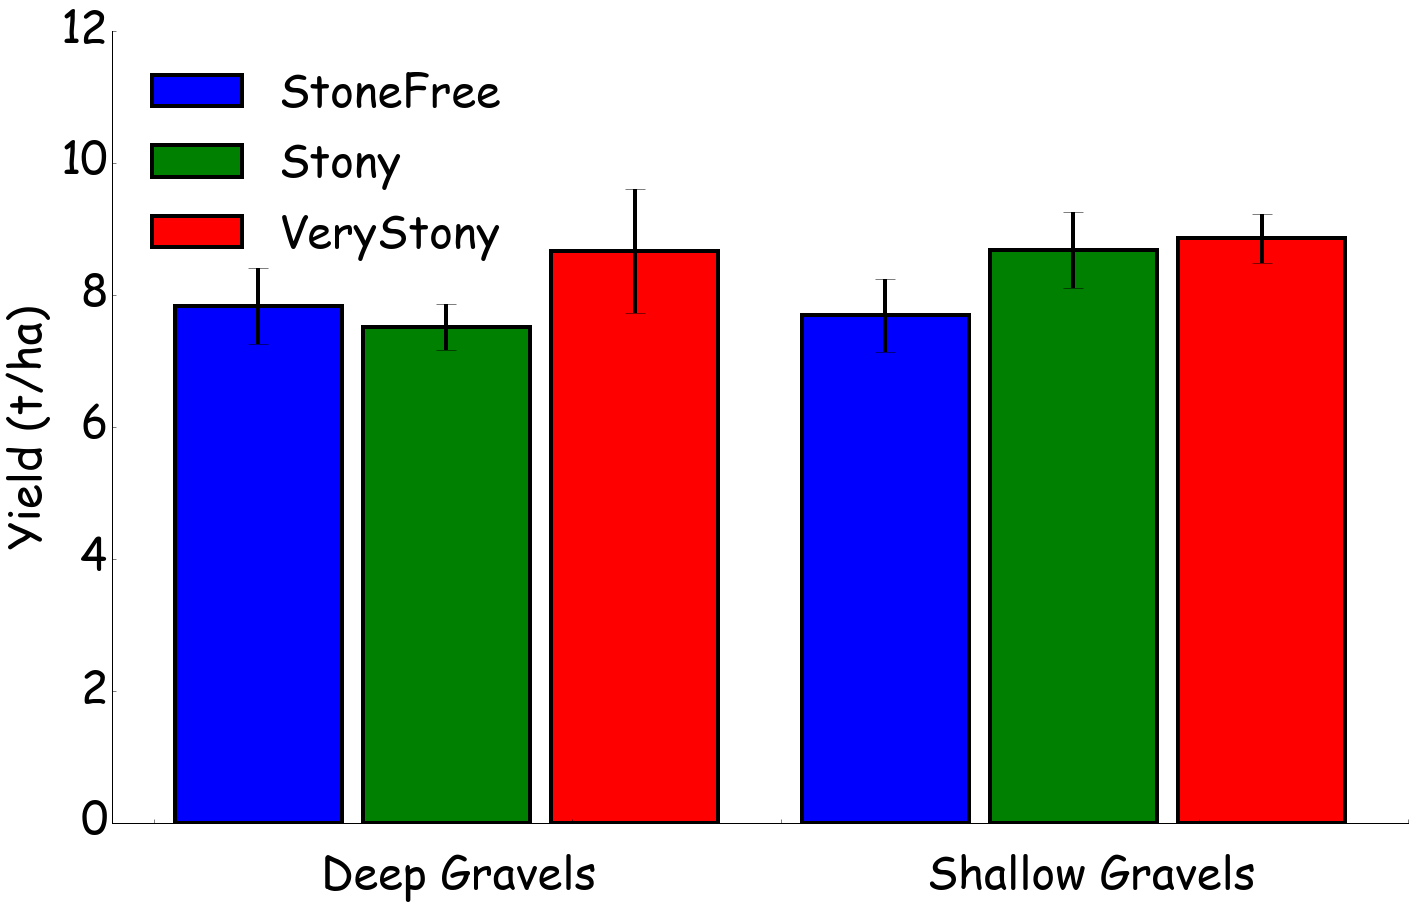

In [44]:
Graph = plt.figure(figsize=(18,11))
ax = Graph.add_axes((0, 0, 1, 1))

errorParams = dict(ecolor='k', elinewidth=4, capsize=10)

plt.bar([1.1,4.1],YieldMeans.ix['StoneFree'],yerr = YieldSEM.ix['StoneFree'],
        color='b', label = 'StoneFree',linewidth=4,edgecolor='k',error_kw = errorParams)
plt.bar([2,5],YieldMeans.ix['Stony'],yerr = YieldSEM.ix['Stony'],
        color='g', label = 'Stony',linewidth=4,edgecolor='k',error_kw = errorParams)
plt.bar([2.9,5.9],YieldMeans.ix['VeryStony'],yerr = YieldSEM.ix['VeryStony'],
        color='r', label = 'VeryStony',linewidth=4,edgecolor='k',error_kw = errorParams)
plt.xlim(0.8,7)
plt.ylim(0,12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend(loc=2,fontsize=45)
ax.xaxis.set_ticklabels([])
ax.tick_params(labelsize=45)   
plt.ylabel('Yield (t/ha)', fontsize = 45)
ax.text(1.8,-1,'Deep Gravels', fontsize = 45)
ax.text(4.7,-1,'Shallow Gravels', fontsize = 45)
Graph.savefig('Yields.jpg',dpi=400,pad_inches=1)

In [45]:
CropNMeans = YieldData['TotalN'].groupby(level = ['Stones','Gravels'], axis=0).mean()
CropNSEM = YieldData['TotalN'].groupby(level = ['Stones','Gravels'], axis=0).std()/np.sqrt(4)

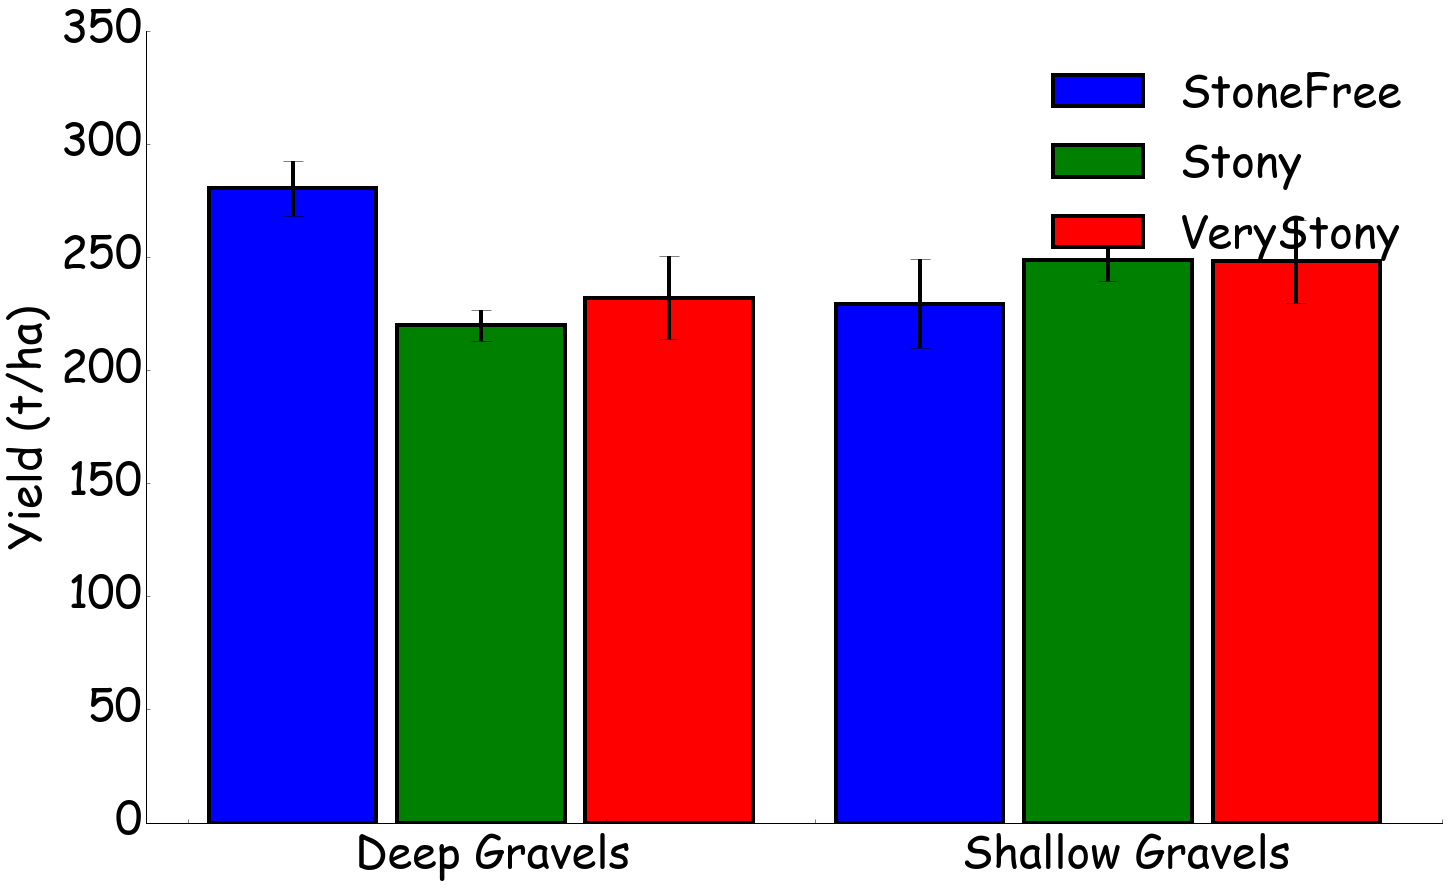

In [46]:
Graph = plt.figure(figsize=(18,11))
ax = Graph.add_axes((0, 0, 1, 1))

errorParams = dict(ecolor='k', elinewidth=4, capsize=10)

plt.bar([1.1,4.1],CropNMeans.ix['StoneFree'],yerr = CropNSEM.ix['StoneFree'],
        color='b', label = 'StoneFree',linewidth=4,edgecolor='k',error_kw = errorParams)
plt.bar([2,5],CropNMeans.ix['Stony'],yerr = CropNSEM.ix['Stony'],
        color='g', label = 'Stony',linewidth=4,edgecolor='k',error_kw = errorParams)
plt.bar([2.9,5.9],CropNMeans.ix['VeryStony'],yerr = CropNSEM.ix['VeryStony'],
        color='r', label = 'VeryStony',linewidth=4,edgecolor='k',error_kw = errorParams)
plt.xlim(0.8,7)
plt.ylim(0,350)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend(loc=1,fontsize=45)
ax.xaxis.set_ticklabels([])
ax.tick_params(labelsize=45)   
plt.ylabel('Yield (t/ha)', fontsize = 45)
ax.text(1.8,-20,'Deep Gravels', fontsize = 45)
ax.text(4.7,-20,'Shallow Gravels', fontsize = 45)
Graph.savefig('Yields.jpg',dpi=400,pad_inches=1)

##Produce profile soil water content graphs

In [47]:
Accum = np.add(Data.ix[:,'D1'].values * 150, Data.ix[:,'D2'].values * 150)
Accum = np.add(Accum, Data.ix[:,'D3'].values * 150)
Accum = np.add(Accum, Data.ix[:,'D4'].values * 150)
ProfileWater = pd.DataFrame(index = Data.index, data = Accum, columns = Data.ix[:,'D1'].columns)

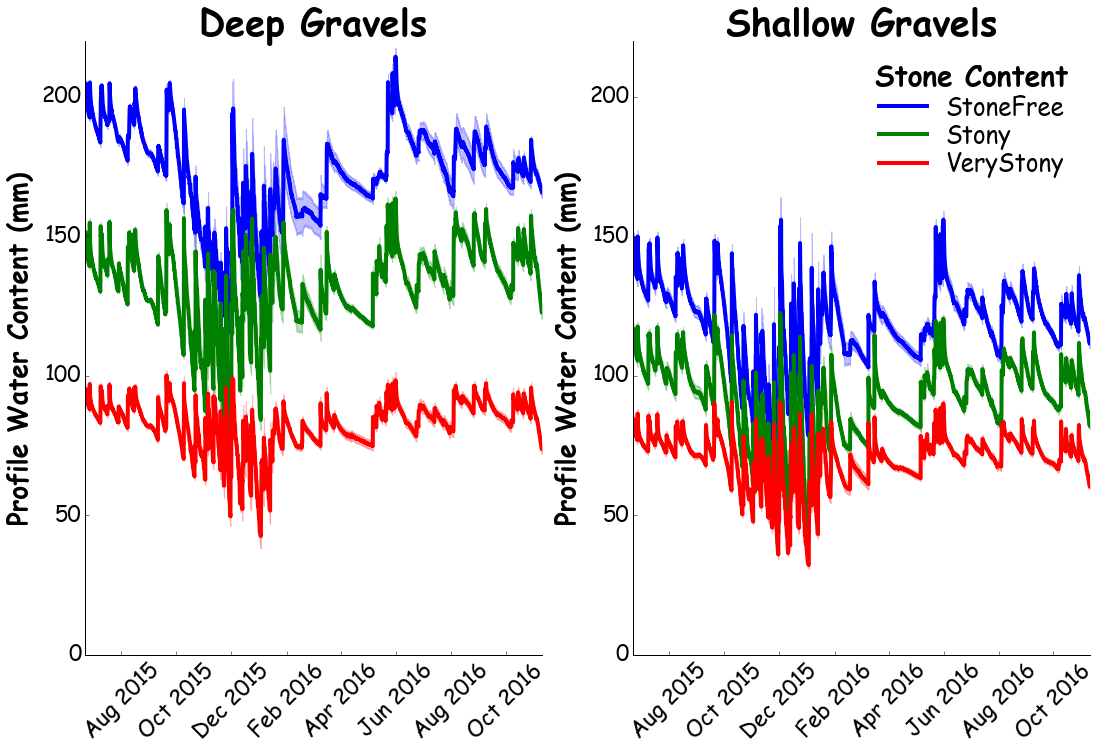

In [48]:
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']

Graph = plt.figure(figsize=(18,11))

GravPos = 0
for Grav in Gravels:
    fig = Graph.add_subplot(1,2,GravPos+1)
    StonPos = 0
    for Ston in Stones:
        median = ProfileWater.ix['2015-06-22':,(Grav,Ston)].median(axis=1)
        SEM = ProfileWater.ix['2015-06-22':,(Grav,Ston)].std(axis=1)/np.sqrt(4)
        Upper = median + SEM
        Lower = median - SEM
        plt.fill_between(ProfileWater.ix['2015-06-22':,(Grav,Ston)].index,
                 Upper,
                 Lower,
                 color = colors[StonPos],alpha=0.25)
        plt.plot(ProfileWater.ix['2015-06-22':,(Grav,Ston)].index,median,color=colors[StonPos],
                 linewidth = 4,
                 label = Ston)
        StonPos += 1
        plt.title(Grav + ' Gravels', fontsize=36, weight='bold')
        fig.spines['right'].set_visible(False)
        fig.spines['top'].set_visible(False)
        fig.yaxis.set_ticks_position('left')
        fig.xaxis.set_ticks_position('bottom')
    GravPos +=1
    plt.ylim(0,220)
    plt.ylabel('Profile Water Content (mm)', fontsize=26, weight='bold')
    plt.xticks(rotation=45)
    plt.tick_params(labelsize=22)    
    if GravPos ==2:
        ledg = plt.legend(loc=1,numpoints=1,fontsize = 24,labelspacing = 0.05, 
                          title='Stone Content')
        ledg.get_title().set_fontsize(28)
        ledg.get_title().set_weight('bold')
plt.tight_layout
plt.savefig('SWD.jpg',dpi=400)


##Graph plot volumetric water content by layer

<function matplotlib.pyplot.tight_layout>

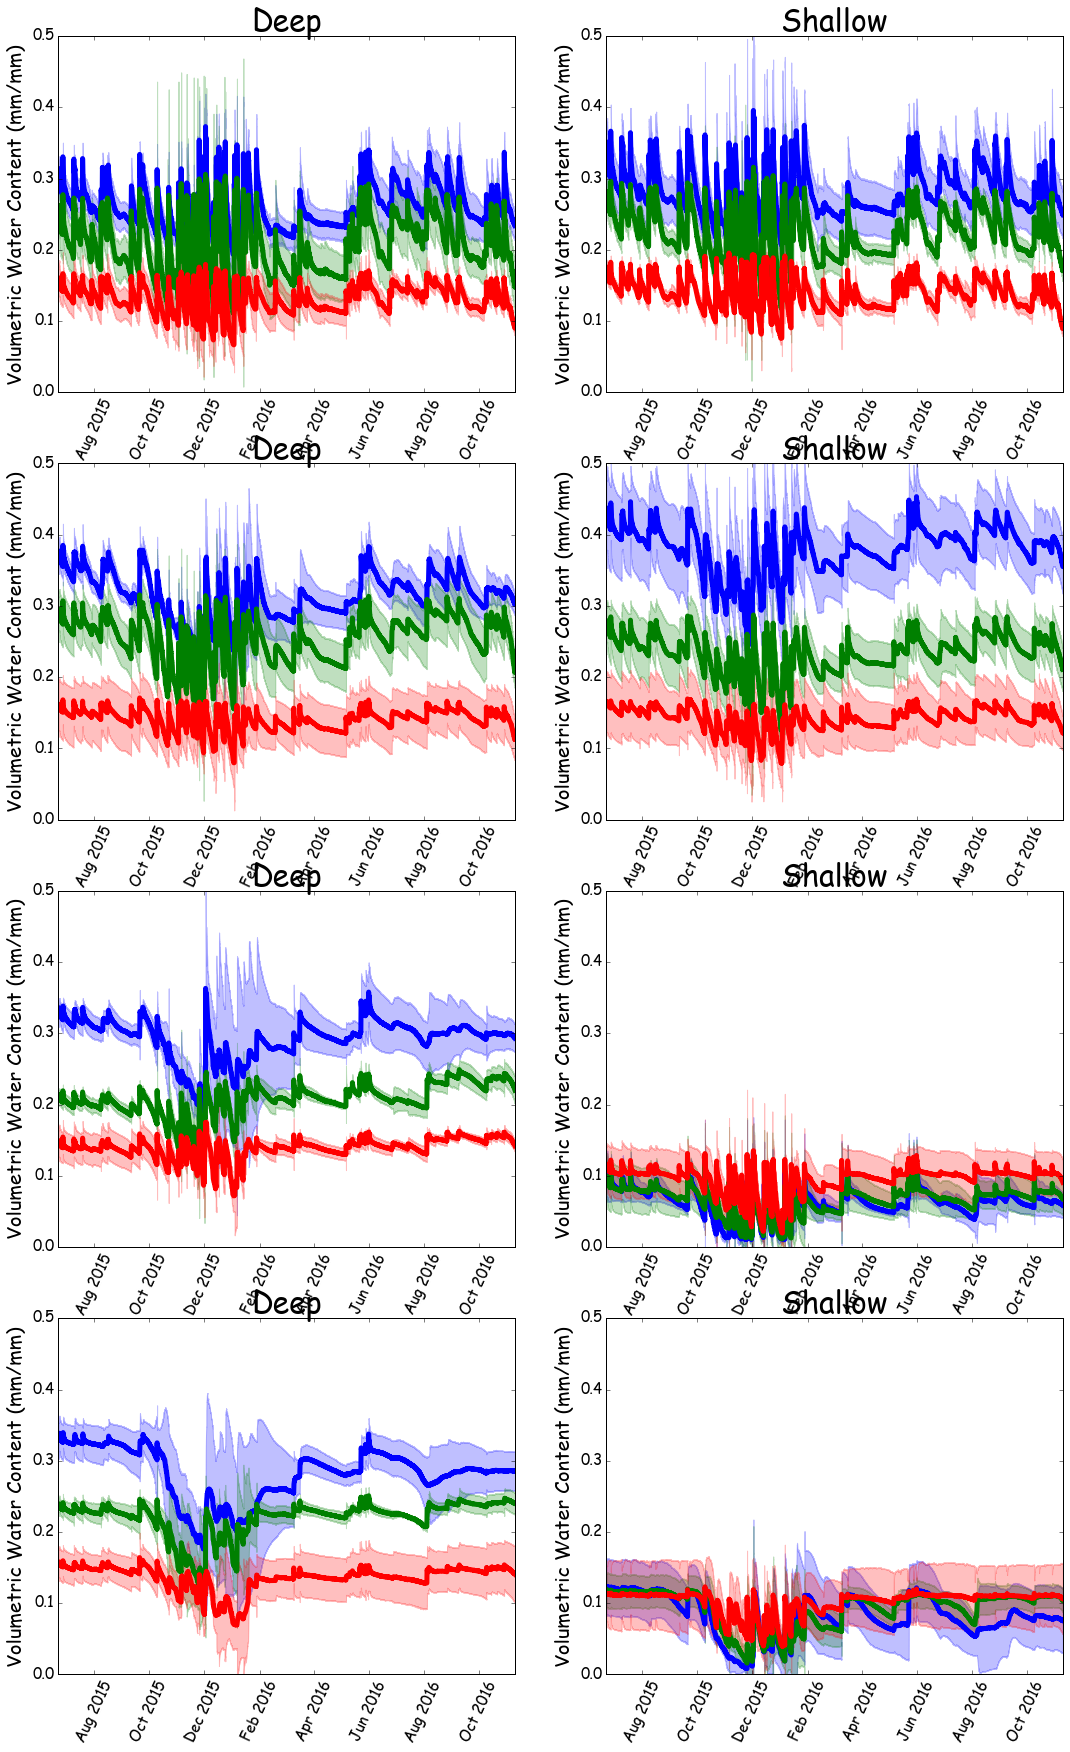

In [49]:
Depths = ['D1','D2','D3','D4']
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']

Graph = plt.figure(figsize=(18,60))

Pos = 1
for Depth in Depths:    
    for Grav in Gravels:
        fig = Graph.add_subplot(8,2,Pos)
        StonPos = 0
        for Ston in Stones:
            median = Data.ix['2015-06-22':,(Depth,Grav,Ston)].median(axis=1)
            SE = Data.ix['2015-06-22':,(Depth,Grav,Ston)].std(axis=1)
            Upper = median + SE *2
            Lower = median - SE *2
            plt.fill_between(Data.ix['2015-06-22':,(Depth,Grav,Ston)].index,
                     Upper,
                     Lower,
                     color = colors[StonPos],alpha=0.25)
            plt.plot(Data.ix['2015-06-22':,(Depth,Grav,Ston)].index,median,color=colors[StonPos],
                     linewidth = 5,
                     label = Grav+' ' +Ston)
            StonPos += 1
            plt.title(Grav, fontsize=30)
        Pos +=1
        plt.ylim(0,0.5)
        plt.ylabel('Volumetric Water Content (mm/mm)', fontsize=20)
        plt.xticks(rotation=65)
        plt.tick_params(labelsize=15)    
        #plt.legend(loc=2,numpoints=1,fontsize = 15)
plt.tight_layout

##Create and populate Plant Available Water (PAW) data frame

In [50]:
ROData = Data.copy()
ROData.columns = ROData.columns.swaplevel('Sensor','Depth') #get index in the right order for graphing
PAW = pd.DataFrame(index = Data.index, columns = ROData.columns)  #Set up empty dataframe with the same index and column structure as TDR dataPAW = pd.DataFrame(index = VWC.index, columns = VWC.columns)  #Set up empty dataframe with the same index and column structure as TDR data
for X in range (1,97): 
    SensorRef = 'S_' + np.str(X)
    Horizon = HorizonIndex.ix[X,'Horizon']
    LL = SensorCoefficients.ix[Horizon,'LL']
    PAW[SensorRef] = ROData[SensorRef].values - LL
    
PAW.columns = PAW.columns.swaplevel('Sensor','Depth')

##Graph Plant available water

<function matplotlib.pyplot.tight_layout>

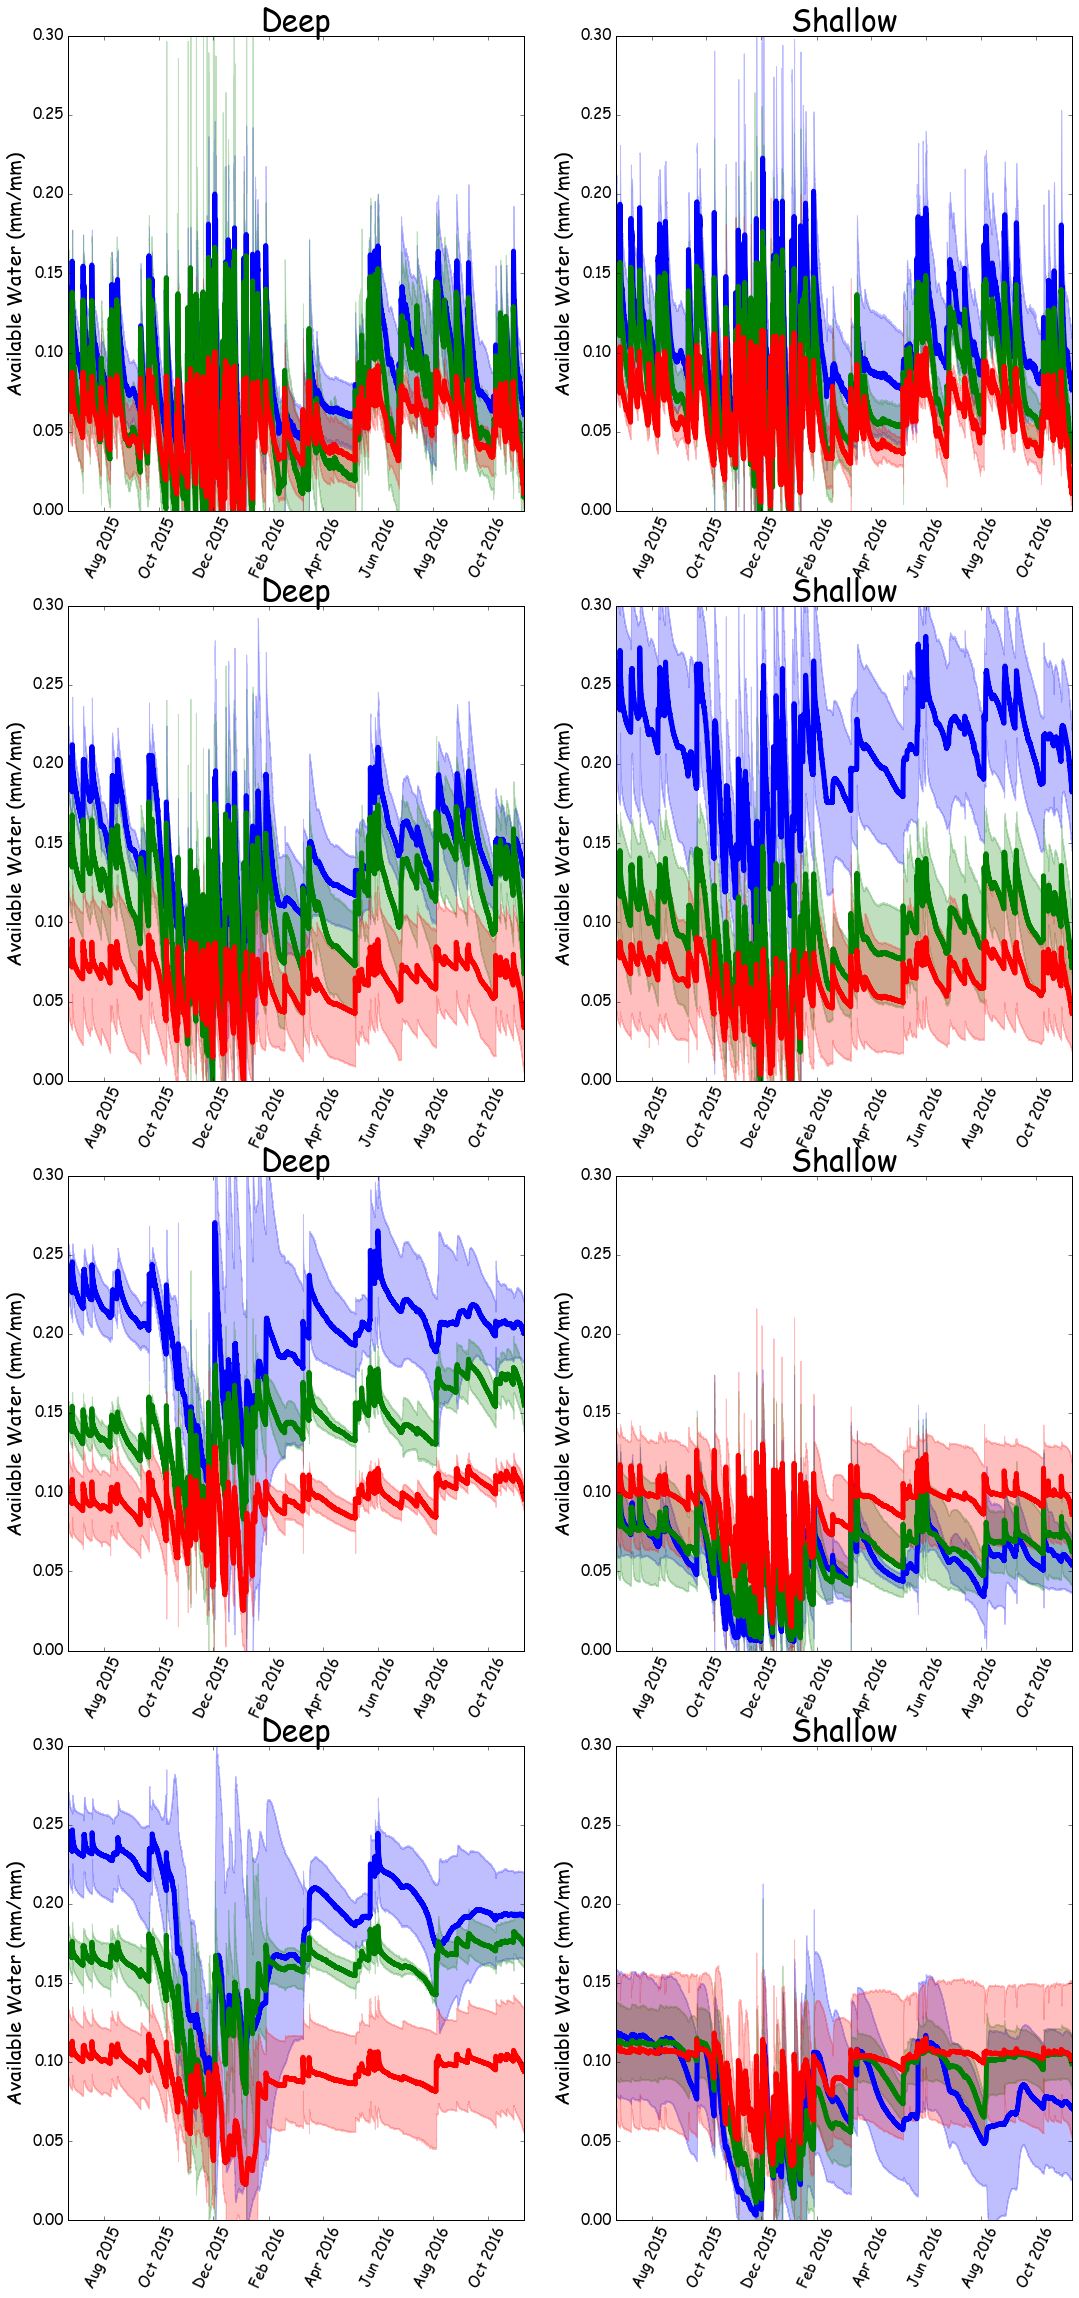

In [51]:
Depths = ['D1','D2','D3','D4']
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']

Graph = plt.figure(figsize=(18,80))

Pos = 1
for Depth in Depths:    
    for Grav in Gravels:
        fig = Graph.add_subplot(8,2,Pos)
        StonPos = 0
        for Ston in Stones:
            median = PAW.ix['2015-06-22':,(Depth,Grav,Ston)].median(axis=1)
            SE = PAW.ix['2015-06-22':,(Depth,Grav,Ston)].std(axis=1)
            Upper = median + SE *2
            Lower = median - SE *2
            plt.fill_between(PAW.ix['2015-06-22':,(Depth,Grav,Ston)].index,
                     Upper,
                     Lower,
                     color = colors[StonPos],alpha=0.25)
            plt.plot(PAW.ix['2015-06-22':,(Depth,Grav,Ston)].index,median,color=colors[StonPos],
                     linewidth = 5,
                     label = Grav+' ' +Ston)
            StonPos += 1
            plt.title(Grav, fontsize=30)
        Pos +=1
        plt.ylim(0,0.3)
        plt.ylabel('Available Water (mm/mm)', fontsize=20)
        plt.xticks(rotation=65)
        plt.tick_params(labelsize=15)    
        #plt.legend(loc=2,numpoints=1,fontsize = 15)
plt.tight_layout

##Set up a series with DUL values and assign these to HorizonIndex

In [52]:
#Assume values on 26 June represent DUL.  This was following large rainfall on the 24th of June allowing two 
#days of drainage.  ET was very low during these two days so evaporative losses would have been small.
DULValues = Data.ix['2015-06-26 12:00:00',:].copy()

#Get rid of all the index columns that I don't need leaving only the sensor reference as an index
DULValues.columns = DULValues.columns.droplevel('Gravels')
DULValues.columns = DULValues.columns.droplevel('Stones')
DULValues.columns = DULValues.columns.droplevel('Column')
DULValues.columns = DULValues.columns.droplevel('Depth')
DULValues.columns = DULValues.columns.droplevel('MUX')
DULValues.columns = DULValues.columns.droplevel('Port')
DULValues.columns = DULValues.columns.droplevel('Units')
DULValues.columns = DULValues.columns.droplevel('Summary')
DULValues.columns = DULValues.columns.droplevel('Block')
DULValues.columns = DULValues.columns.droplevel('Treatment')

for X in range (1,97): 
    SensorRef = 'S_' + np.str(X)
    HorizonIndex.ix[X,'DUL'] = DULValues.ix['2015-06-26 12:00:00',SensorRef] 

##Create and populate a Relative Plant Available Water (RPAW) data frame

In [53]:
#Set up empty dataframe with the same index and column structure as TDR data to hold Relative Plant Available Water values
PAW.columns = PAW.columns.swaplevel('Sensor','Depth')

RPAW = pd.DataFrame(index = PAW.index, columns = PAW.columns)  

for X in range (1,97): 
    SensorRef = 'S_' + np.str(X)
    Horizon = HorizonIndex.ix[X,'Horizon']
    LL = SensorCoefficients.ix[Horizon,'LL']
    PAWC = HorizonIndex.ix[X,'DUL'] - LL
    RPAW[SensorRef] = PAW[SensorRef].divide(PAWC)
    
PAW.columns = PAW.columns.swaplevel('Sensor','Depth')
RPAW.columns = RPAW.columns.swaplevel('Sensor','Depth')

##Graph Relative Plant Available Water

<function matplotlib.pyplot.tight_layout>

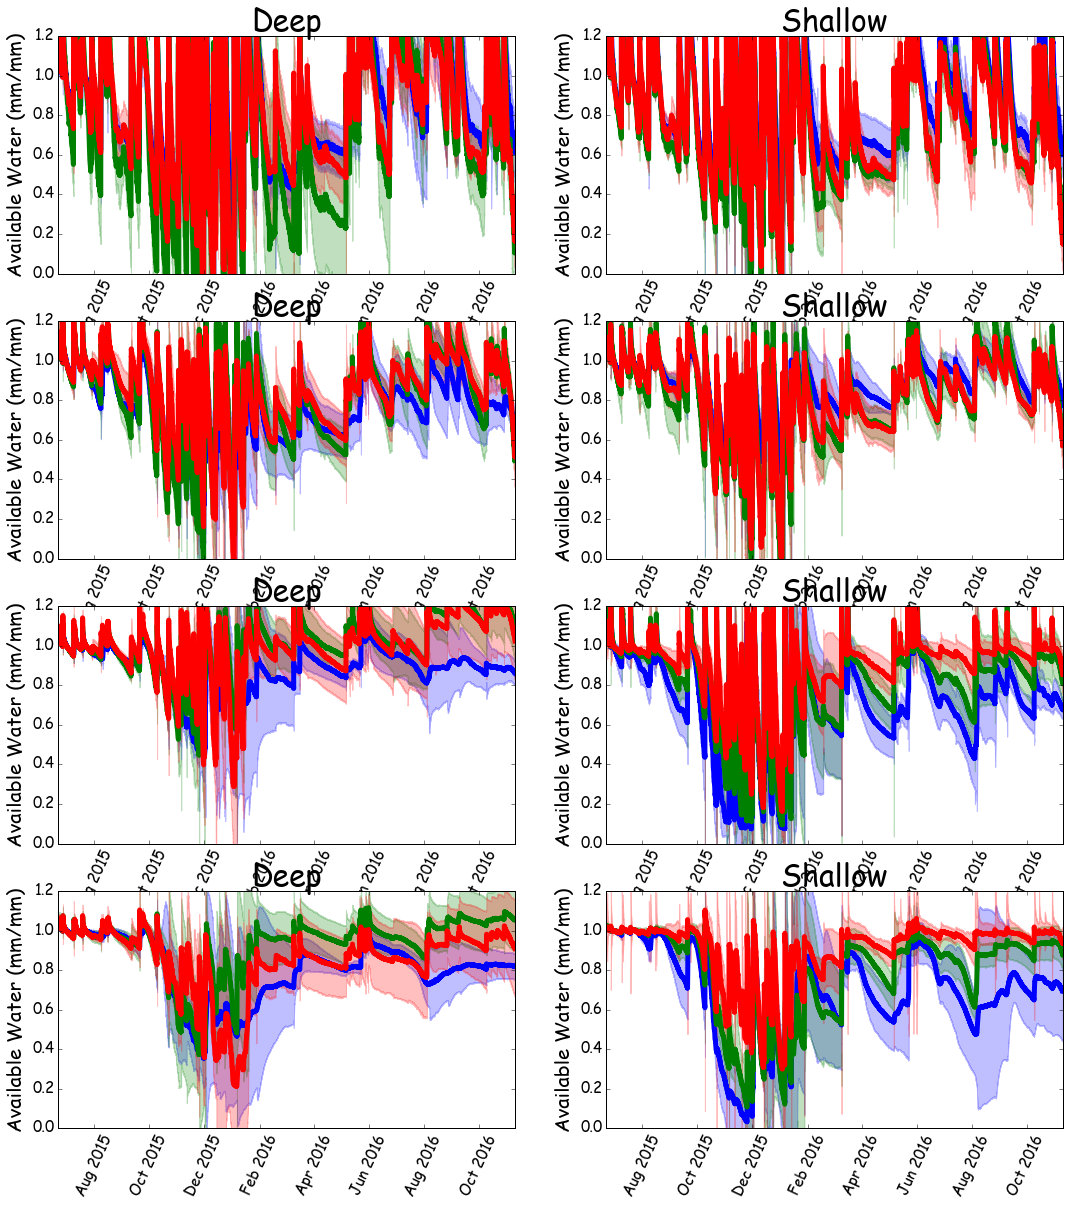

In [54]:
Depths = ['D1','D2','D3','D4']
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']

Graph = plt.figure(figsize=(18,40))

Pos = 1
for Depth in Depths:    
    for Grav in Gravels:
        fig = Graph.add_subplot(8,2,Pos)
        StonPos = 0
        for Ston in Stones:
            median = RPAW.ix['2015-06-22':,(Depth,Grav,Ston)].median(axis=1)
            SE = RPAW.ix['2015-06-22':,(Depth,Grav,Ston)].std(axis=1)
            Upper = median + SE *2
            Lower = median - SE *2
            plt.fill_between(RPAW.ix['2015-06-22':,(Depth,Grav,Ston)].index,
                     Upper,
                     Lower,
                     color = colors[StonPos],alpha=0.25)
            plt.plot(RPAW.ix['2015-06-22':,(Depth,Grav,Ston)].index,median,color=colors[StonPos],
                     linewidth = 5,
                     label = Grav+' ' +Ston)
            StonPos += 1
            plt.title(Grav, fontsize=30)
        Pos +=1
        plt.ylim(0,1.2)
        plt.ylabel('Available Water (mm/mm)', fontsize=20)
        plt.xticks(rotation=65)
        plt.tick_params(labelsize=15)    
        #plt.legend(loc=2,numpoints=1,fontsize = 15)
plt.tight_layout

##Calculate crop water use

C:\Users\cflhxb\AppData\Roaming\Python\Python27\site-packages\ipykernel\__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  app.launch_new_instance()


Gravels  Stones   
Deep     StoneFree   -0.204436
         Stony       -0.241867
         VeryStony   -0.151860
Shallow  StoneFree   -0.229793
         Stony       -0.226314
         VeryStony   -0.154703
dtype: float64

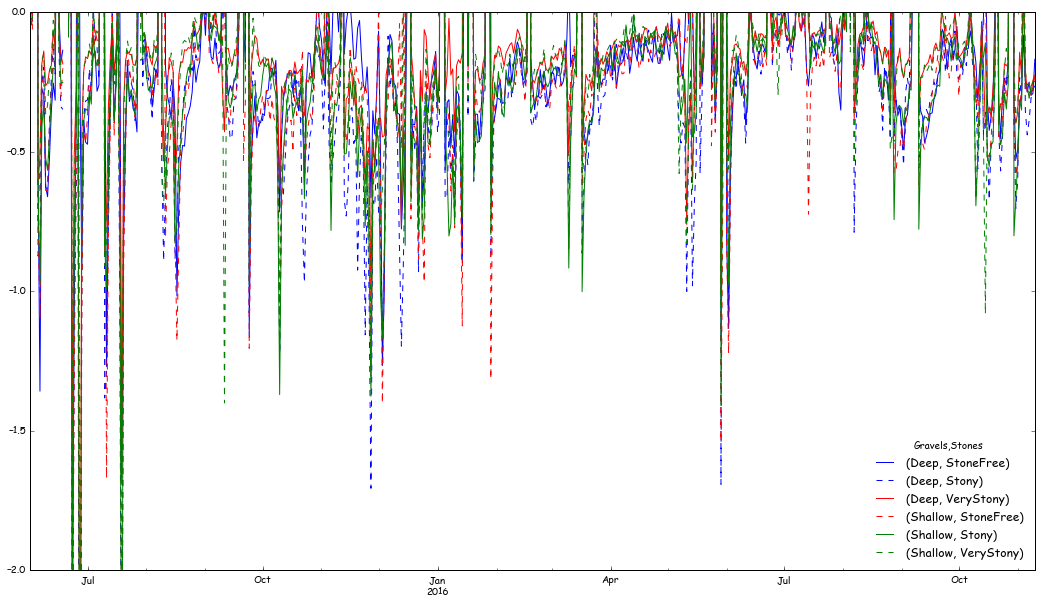

In [55]:
WaterDelta = ProfileWater.ix['2015-06-01':,:].diff()
DarkWaterDeltas = WaterDelta.ix[WaterDelta.index.indexer_between_time(datetime.time(23),datetime.time(5))]
DarkWaterDeltas = DarkWaterDeltas.resample('D', how='sum')
MeanDarkWaterDeltas = DarkWaterDeltas.groupby(level=['Gravels', 'Stones'],axis=1).mean()
MeanDarkWaterDeltas.plot( figsize=(18,10), style=['b-','b--','r-','r--','g-','g--'])
plt.ylim(-2,0)
MeanDarkWaterDeltas.median(axis=0)

In [56]:
IrrigationDates = ['2014-12-22',
'2015-01-12',
'2015-01-13',
'2015-01-21',
'2015-01-26',
'2015-03-10',
'2015-04-01',
'2015-04-02',
'2015-04-07',
'2015-04-08',
'2015-10-09',
'2015-10-22',
'2015-11-02',
'2015-11-05',
'2015-11-11',
'2015-11-19',
'2015-11-23',
'2015-11-25',
'2015-11-25',
'2015-11-30',
'2015-12-01',
'2015-12-02',
'2015-12-03',
'2015-12-11',
'2015-12-14',
'2015-12-23',
'2015-12-24',
'2016-01-06',
'2016-01-13',
'2016-03-09',
'2016-03-28']

IrrigationAmounts = [16.80,
15.70,
16.00,
18.50,
18.36,
47.00,
10.00,
10.00,
10.00,
5.00,
40.00,
20.00,
21.00,
21.00,
20.00,
20.00,
21.00,
19.00,
20.00,
18.50,
20.50,
37.00,
18.00,
21.00,
22.00,
40,
20,
43.00,
40.50,
20,
0]

Irrigation = pd.DataFrame(index=IrrigationDates, data=IrrigationAmounts,columns=['Irrigation'])
Irrigation.index = Irrigation.index.to_datetime()
DailyIrrigation = Irrigation.resample('D',how='sum')
DailyIrrigation.replace(to_replace=np.nan,value=0,inplace=True)

#Add irrigation and rainfall together to give precipitation
Precip = MetData.ix[:,'Rain'].add(DailyIrrigation.ix['2015-06-01':,'Irrigation'])
PrecipMask = Precip.where(Precip<5,1000000)
PrecipMask = PrecipMask.where(PrecipMask==1000000,1)
PrecipMask = PrecipMask.where(PrecipMask==1,np.nan)

C:\Users\cflhxb\AppData\Roaming\Python\Python27\site-packages\ipykernel\__main__.py:67: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


In [57]:
CropDates = ['2015-06-19',
'2015-07-19',
'2015-08-01',
'2015-10-25',
'2015-11-16',
'2015-11-25',
'2015-12-14',
'2015-12-30',
'2016-01-11',
'2016-01-20',
'2016-02-20',
'2016-03-28']

CoverData = [0.00,
0.00,
0.05,
0.65,
0.82,
0.83,
0.86,
0.92,
0.79,
0.42,
0.00,
0.00]

CropCover = pd.DataFrame(index=CropDates, data=CoverData, columns = ['Cover'])

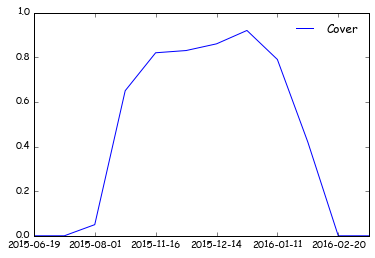

In [58]:
CropCover.plot()

Full Cover from 1-nov to 20-Jan

In [59]:
#Set up daily water use sums
WaterUseDaily = WaterDelta.ix['2015-06-19':'2016-03-28',:].resample('D', how='sum')
WaterUseDaily.index.name = 'Date'

#Subtract irrigation to give water use values
WaterUseDaily = WaterUseDaily.subtract(Precip.ix[WaterUseDaily.index], axis=0)
WaterUseDaily = WaterUseDaily.add(Drainage.ix[WaterUseDaily.index].values, axis=0)

#Make water use positive
WaterUseDaily = WaterUseDaily.ix[:'2016-03-28'].multiply(-1)
WaterUseDaily['PET'] = MetData.ix['2015-06-19':,'ET']

C:\Users\cflhxb\AppData\Roaming\Python\Python27\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  from ipykernel import kernelapp as app


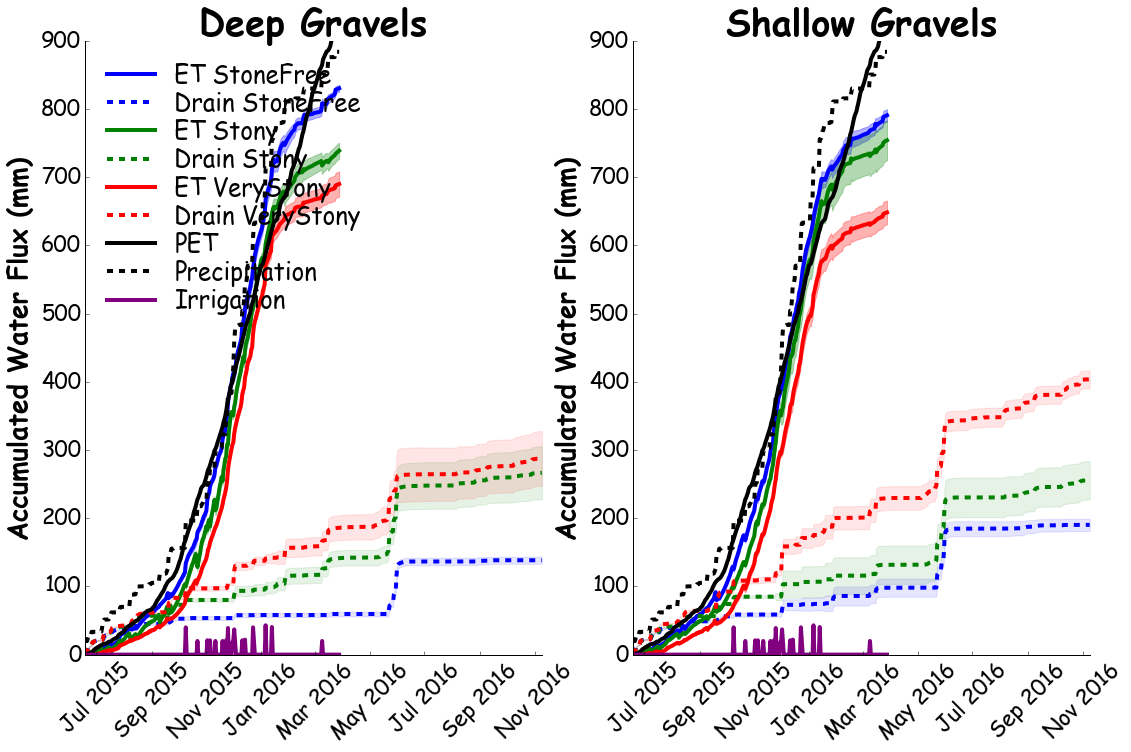

In [60]:
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']

Graph = plt.figure(figsize=(18,11))

GravPos = 0
for Grav in Gravels:
    fig = Graph.add_subplot(1,2,GravPos+1)
    StonPos = 0
    for Ston in Stones:
        median = WaterUseDaily.ix[:,(Grav,Ston)].cumsum().median(axis=1)
        SEM = WaterUseDaily.ix[:,(Grav,Ston)].cumsum().std(axis=1)/np.sqrt(4)
        Upper = median + SEM
        Lower = median - SEM
        plt.fill_between(WaterUseDaily.ix[:,(Grav,Ston)].index,
                 Upper,
                 Lower,
                 color = colors[StonPos],alpha=0.3)
        plt.plot(WaterUseDaily.ix[:,(Grav,Ston)].index,median,color=colors[StonPos],
                 linewidth = 4,
                 label = 'ET ' +Ston)
        median = Drainage.ix[:,('Drainage',Grav,Ston)].cumsum().median(axis=1)
        SEM = Drainage.ix[:,('Drainage',Grav,Ston)].cumsum().std(axis=1)/np.sqrt(4)
        Upper = median + SEM
        Lower = median - SEM
        plt.fill_between(Drainage.ix[:,('Drainage',Grav,Ston)].index,
                 Upper,
                 Lower,
                 color = colors[StonPos],alpha=0.1)
        plt.plot(Drainage.ix[:,('Drainage',Grav,Ston)].index,median,
                 '--', color=colors[StonPos],
                 linewidth = 4,
                 label = 'Drain ' +Ston)
        StonPos += 1
        fig.spines['right'].set_visible(False)
        fig.spines['top'].set_visible(False)
        fig.yaxis.set_ticks_position('left')
        fig.xaxis.set_ticks_position('bottom')
        plt.title(Grav+' Gravels', fontsize=36, weight='bold')
    GravPos +=1
    plt.ylim(0,900)
    plt.ylabel('Accumulated Water Flux (mm)', fontsize=26, weight='bold')
    plt.xticks(rotation=45)
    plt.tick_params(labelsize=22)    
    plt.plot(WaterUseDaily.ix[:,'PET'].index,WaterUseDaily.ix[:,'PET'].cumsum(),
             color='k',linewidth=4, label='PET')
    plt.plot(Precip.ix[WaterUseDaily.index].index,Precip.ix[WaterUseDaily.index].cumsum(),
            '--',color='k',linewidth=4, label='Precipitation')
    plt.plot(DailyIrrigation.ix['2015-06-22':,:].index,DailyIrrigation.ix['2015-06-22':,:],
                '-',linewidth=4,color='purple',label='Irrigation')
    if GravPos ==1:
        ledg = plt.legend(loc=2,numpoints=1,fontsize = 24,labelspacing = 0.05)
plt.tight_layout
plt.savefig('ETandDrain.jpg',dpi=400)

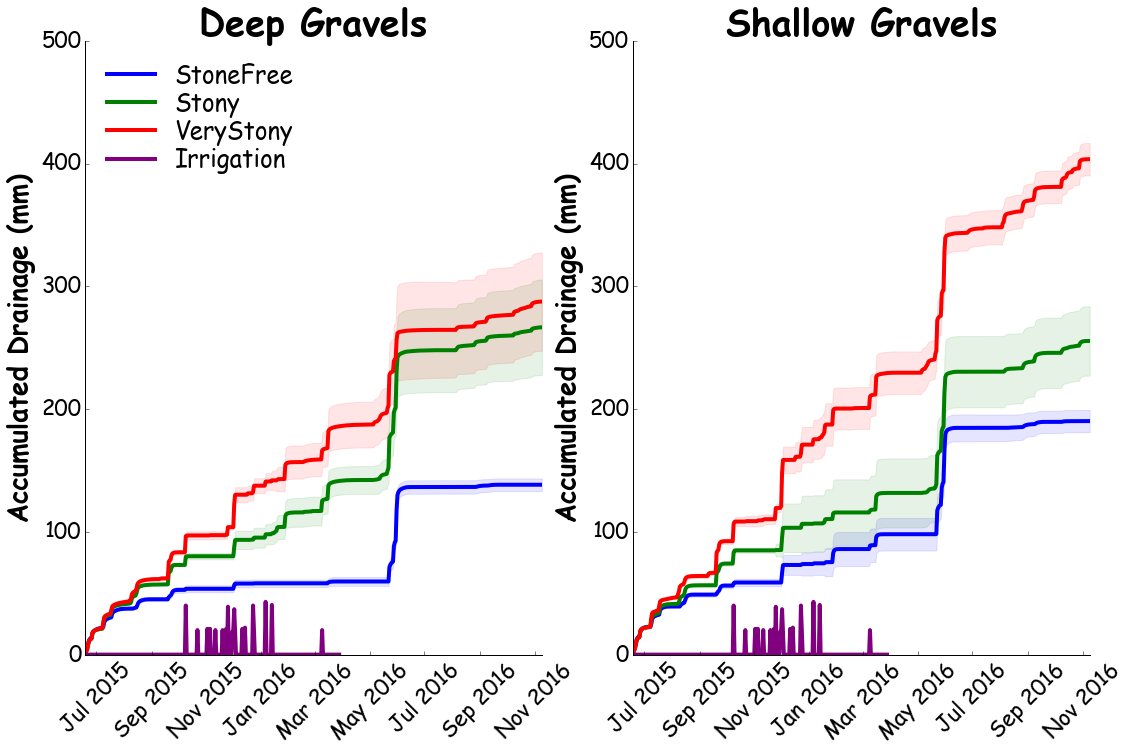

In [69]:
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']

Graph = plt.figure(figsize=(18,11))

GravPos = 0
for Grav in Gravels:
    fig = Graph.add_subplot(1,2,GravPos+1)
    StonPos = 0
    for Ston in Stones:
        median = WaterUseDaily.ix[:,(Grav,Ston)].cumsum().median(axis=1)
        SEM = WaterUseDaily.ix[:,(Grav,Ston)].cumsum().std(axis=1)/np.sqrt(4)
        Upper = median + SEM
        Lower = median - SEM
        #plt.fill_between(WaterUseDaily.ix[:,(Grav,Ston)].index,
        #         Upper,
        #         Lower,
        #         color = colors[StonPos],alpha=0.3)
        #plt.plot(WaterUseDaily.ix[:,(Grav,Ston)].index,median,color=colors[StonPos],
        #         linewidth = 4,
        #         label = 'ET ' +Ston)
        median = Drainage.ix[:,('Drainage',Grav,Ston)].cumsum().median(axis=1)
        SEM = Drainage.ix[:,('Drainage',Grav,Ston)].cumsum().std(axis=1)/np.sqrt(4)
        Upper = median + SEM
        Lower = median - SEM
        plt.fill_between(Drainage.ix[:,('Drainage',Grav,Ston)].index,
                 Upper,
                 Lower,
                 color = colors[StonPos],alpha=0.1)
        plt.plot(Drainage.ix[:,('Drainage',Grav,Ston)].index,median,
                 '-', color=colors[StonPos],
                 linewidth = 4,
                 label = Ston)
        StonPos += 1
        fig.spines['right'].set_visible(False)
        fig.spines['top'].set_visible(False)
        fig.yaxis.set_ticks_position('left')
        fig.xaxis.set_ticks_position('bottom')
        plt.title(Grav+' Gravels', fontsize=36, weight='bold')
    GravPos +=1
    plt.ylim(0,500)
    plt.ylabel('Accumulated Drainage (mm)', fontsize=26, weight='bold')
    plt.xticks(rotation=45)
    plt.tick_params(labelsize=22)    
    #plt.plot(WaterUseDaily.ix[:,'PET'].index,WaterUseDaily.ix[:,'PET'].cumsum(),
    #         color='k',linewidth=4, label='PET')
    #plt.plot(Precip.ix[WaterUseDaily.index].index,Precip.ix[WaterUseDaily.index].cumsum(),
    #        '--',color='k',linewidth=4, label='Precipitation')
    plt.plot(DailyIrrigation.ix['2015-06-22':,:].index,DailyIrrigation.ix['2015-06-22':,:],
                '-',linewidth=4,color='purple',label='Irrigation')
    if GravPos ==1:
        ledg = plt.legend(loc=2,numpoints=1,fontsize = 24,labelspacing = 0.05)
plt.tight_layout
plt.savefig('Drain.jpg',dpi=400)

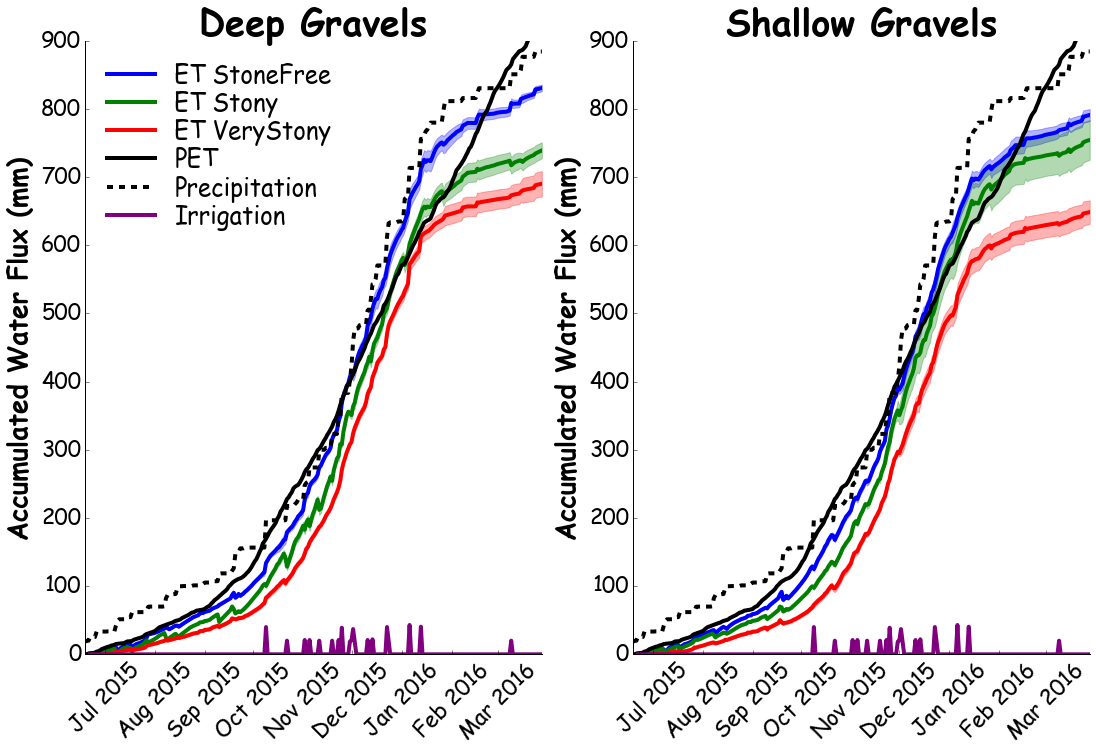

In [62]:
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']

Graph = plt.figure(figsize=(18,11))

GravPos = 0
for Grav in Gravels:
    fig = Graph.add_subplot(1,2,GravPos+1)
    StonPos = 0
    for Ston in Stones:
        median = WaterUseDaily.ix[:,(Grav,Ston)].cumsum().median(axis=1)
        SEM = WaterUseDaily.ix[:,(Grav,Ston)].cumsum().std(axis=1)/np.sqrt(4)
        Upper = median + SEM
        Lower = median - SEM
        plt.fill_between(WaterUseDaily.ix[:,(Grav,Ston)].index,
                 Upper,
                 Lower,
                 color = colors[StonPos],alpha=0.3)
        plt.plot(WaterUseDaily.ix[:,(Grav,Ston)].index,median,color=colors[StonPos],
                 linewidth = 4,
                 label = 'ET ' +Ston)
        median = Drainage.ix[:,('Drainage',Grav,Ston)].cumsum().median(axis=1)
        SEM = Drainage.ix[:,('Drainage',Grav,Ston)].cumsum().std(axis=1)/np.sqrt(4)
        Upper = median + SEM
        Lower = median - SEM
        #plt.fill_between(Drainage.ix[:,('Drainage',Grav,Ston)].index,
        #         Upper,
        #         Lower,
        #         color = colors[StonPos],alpha=0.1)
        #plt.plot(Drainage.ix[:,('Drainage',Grav,Ston)].index,median,
        #         '--', color=colors[StonPos],
        #         linewidth = 4,
        #         label = 'Drain ' +Ston)
        StonPos += 1
        fig.spines['right'].set_visible(False)
        fig.spines['top'].set_visible(False)
        fig.yaxis.set_ticks_position('left')
        fig.xaxis.set_ticks_position('bottom')
        plt.title(Grav+' Gravels', fontsize=36, weight='bold')
    GravPos +=1
    plt.ylim(0,900)
    plt.ylabel('Accumulated Water Flux (mm)', fontsize=26, weight='bold')
    plt.xticks(rotation=45)
    plt.tick_params(labelsize=22)    
    plt.plot(WaterUseDaily.ix[:,'PET'].index,WaterUseDaily.ix[:,'PET'].cumsum(),
             color='k',linewidth=4, label='PET')
    plt.plot(Precip.ix[WaterUseDaily.index].index,Precip.ix[WaterUseDaily.index].cumsum(),
            '--',color='k',linewidth=4, label='Precipitation')
    plt.plot(DailyIrrigation.ix['2015-06-22':,:].index,DailyIrrigation.ix['2015-06-22':,:],
                '-',linewidth=4,color='purple',label='Irrigation')
    if GravPos ==1:
        ledg = plt.legend(loc=2,numpoints=1,fontsize = 24,labelspacing = 0.05)
plt.tight_layout
plt.savefig('ET.jpg',dpi=400)

##Irrigation season summaries

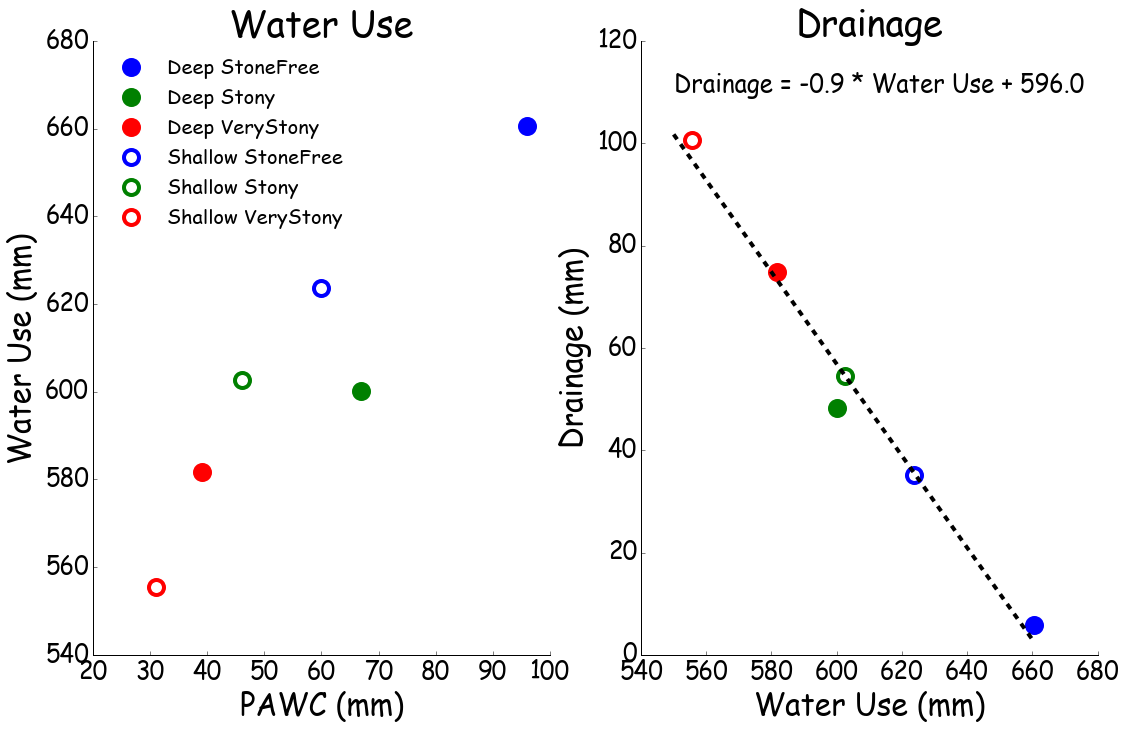

In [63]:
IrrigSeasonDrainage = Drainage.ix['2015-10-01':'2016-02-01'].groupby(level=['Gravels', 'Stones'],axis=1).mean().sum(axis=0)
IrrigSeasonWaterUse = WaterUseDaily.ix['2015-10-01':'2016-02-01'].groupby(level=['Gravels', 'Stones'],axis=1).mean().sum(axis=0)
ProfilePAWC = [96,67,39,60,46,31]

SumData = pd.DataFrame(index=IrrigSeasonDrainage.index,data=IrrigSeasonDrainage, columns=['Drainage'])
SumData.ix[:,'PAWC'] = ProfilePAWC
SumData['WaterUse'] = IrrigSeasonWaterUse[0:6]
SumData
Fillcolors = ['b','g','r','w','w','w']
Edgecolors = ['b','g','r','b','g','r']

Graph = plt.figure(figsize=(18,11))
fig = Graph.add_subplot(1,2,1)
pos=0
for Dat in SumData.index:
    plt.plot(SumData.ix[Dat,'PAWC'],SumData.ix[Dat,'WaterUse'],'o',markersize=15,
             mec=Edgecolors[pos],mfc=Fillcolors[pos],mew=4, label=Dat[0] + ' '+Dat[1])
    pos+=1
plt.tick_params(labelsize=24)
plt.xlim(20,100)
plt.xlabel('PAWC (mm)', fontsize=30)
plt.ylabel('Water Use (mm)', fontsize=30)
plt.legend(loc=2,numpoints=1,fontsize = 20)
plt.title('Water Use', fontsize =36)
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.yaxis.set_ticks_position('left')
fig.xaxis.set_ticks_position('bottom')

fig = Graph.add_subplot(1,2,2)
pos=0
for Dat in SumData.index:
    plt.plot(SumData.ix[Dat,'WaterUse'],SumData.ix[Dat,'Drainage'],'o',markersize=15,
             mec=Edgecolors[pos],mfc=Fillcolors[pos],mew=4, label=Dat[0] + ' '+Dat[1])
    pos+=1
reg = ols('Drainage~WaterUse',data=SumData).fit()
X = [550,660]
Y = []
for x in X:
    y = reg.params[0] + reg.params[1]*x
    Y.append(y)
plt.plot(X,Y,'--',linewidth=4, color='k')
plt.ylim(0,120)
equation = 'Drainage = ' + str(round(reg.params[1],2)) + ' * Water Use' + ' + ' + str(round(reg.params[0]))
plt.text(550,110,equation,fontsize=24)
plt.tick_params(labelsize=24)
plt.xlabel('Water Use (mm)', fontsize=30)
plt.ylabel('Drainage (mm)', fontsize=30)
plt.title('Drainage', fontsize =36)
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.yaxis.set_ticks_position('left')
fig.xaxis.set_ticks_position('bottom')
plt.savefig('Summary.jpg',dpi=400)

##Seasonal analysis of SWC when drainage occured

<function matplotlib.pyplot.tight_layout>

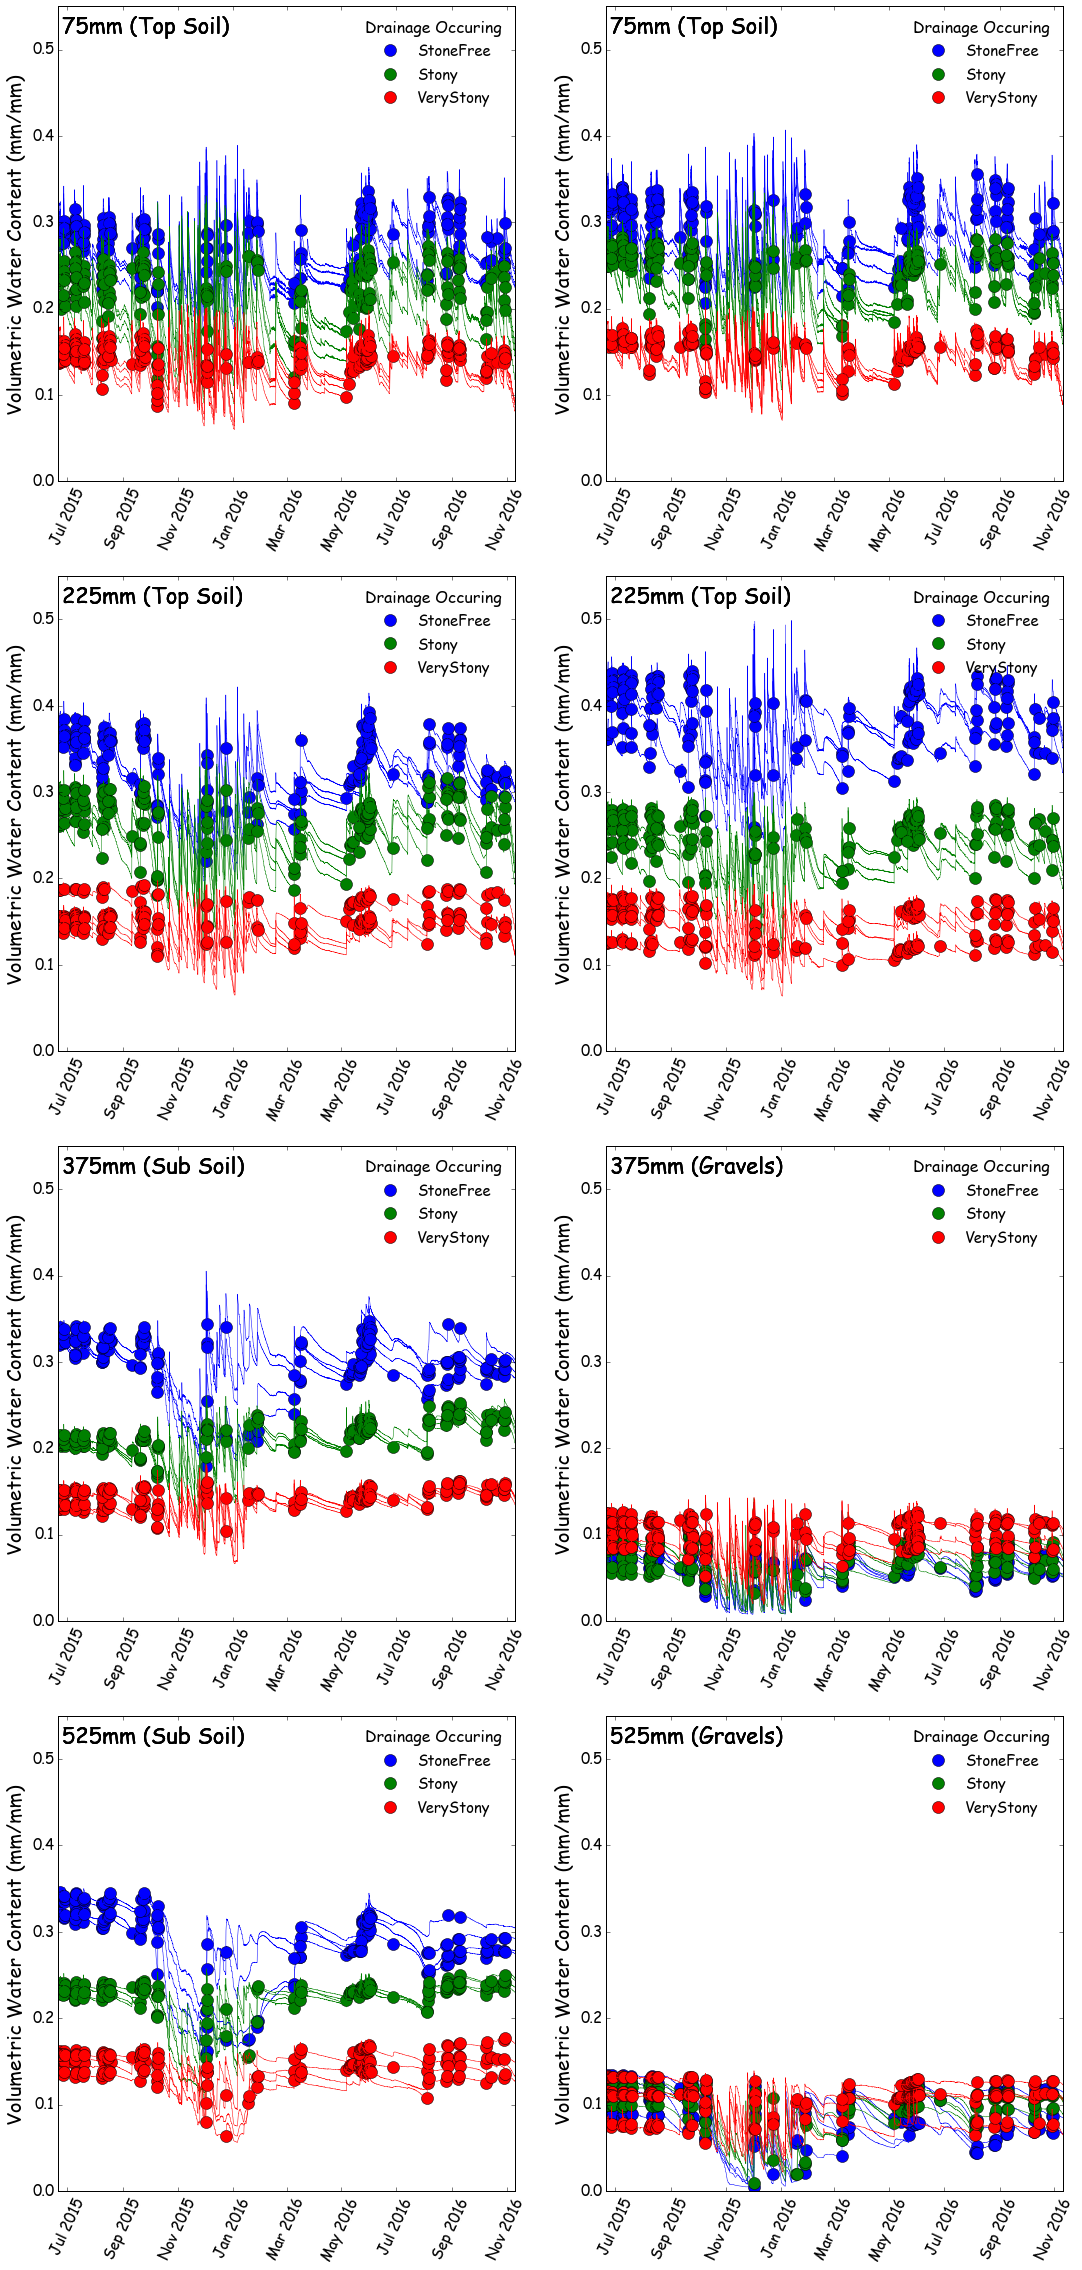

In [72]:
MaxSWC = Data.ix['2015-06-19':,:].resample('D').min() #'2016-03-28'
#MaxSWC.columns = MaxSWC.columns.swaplevel('Column','Block')
for X in range(0,96):
    column = MaxSWC.ix[:,X].name[3]
    DrainageMask = Drainage.ix[MaxSWC.index,Drainage.columns.isin([column],level='Column')].ix[:,0]
    MaxSWC.ix[:,X].where(DrainageMask>1,np.nan,inplace=True)

Depths = ['D1','D2','D3','D4']
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']
MeanDepths = ['75mm','225mm','375mm','525mm']
Horizons = ['Top Soil', 'Top Soil', 'Top Soil','Top Soil','Sub Soil', 'Gravels','Sub Soil', 'Gravels']

Graph = plt.figure(figsize=(18,80))

Pos = 1
DepthPos = 0
for Depth in Depths:    
    for Grav in Gravels:
        fig = Graph.add_subplot(8,2,Pos)
        StonPos = 0
        for Ston in Stones:
            Labels = [Ston,None,None,None]
            Blocklevel=0
            for Block in ['1','2','3','4']:
                plt.plot(MaxSWC.ix[:,(Depth,Grav,Ston,Block)].index,MaxSWC.ix[:,(Depth,Grav,Ston,Block)],
                         'o',
                         markersize=12,
                         color=colors[StonPos],
                         label = Labels[Blocklevel])
                plt.plot(Data.ix['2015-06-19':,:].index,Data.ix['2015-06-19':,(Depth,Grav,Ston,Block)],
                        linewidth=0.5,
                         color=colors[StonPos],)
                Blocklevel+=1
            StonPos += 1
            plt.text('2015-06-25',0.52,MeanDepths[DepthPos] + ' (' +Horizons[Pos-1] +')', fontsize=22)
        Pos +=1
        plt.ylim(0,0.55)
        plt.ylabel('Volumetric Water Content (mm/mm)', fontsize=20)
        plt.xticks(rotation=65)
        plt.tick_params(labelsize=15)    
        ledg = plt.legend(loc=1,numpoints=1,fontsize = 15,title='Drainage Occuring')
        ledg.get_title().set_fontsize('16')
    DepthPos +=1
plt.tight_layout

In [79]:
Data.ix['2015-06-19':,(Depth,Grav,Ston,Block)]

Sensor                   S_81
MUX                         4
Port                        9
Units                 mm3/mm3
Summary                  Samp
Column                     21
Treatment                   F
2015-06-19 00:00:00       NaN
2015-06-19 00:15:00       NaN
2015-06-19 00:30:00       NaN
2015-06-19 00:45:00       NaN
2015-06-19 01:00:00       NaN
2015-06-19 01:15:00       NaN
2015-06-19 01:30:00       NaN
2015-06-19 01:45:00       NaN
2015-06-19 02:00:00       NaN
2015-06-19 02:15:00       NaN
2015-06-19 02:30:00       NaN
2015-06-19 02:45:00       NaN
2015-06-19 03:00:00       NaN
2015-06-19 03:15:00       NaN
2015-06-19 03:30:00       NaN
2015-06-19 03:45:00       NaN
2015-06-19 04:00:00       NaN
2015-06-19 04:15:00       NaN
2015-06-19 04:30:00       NaN
2015-06-19 04:45:00       NaN
2015-06-19 05:00:00       NaN
2015-06-19 05:15:00       NaN
2015-06-19 05:30:00       NaN
2015-06-19 05:45:00       NaN
2015-06-19 06:00:00       NaN
2015-06-19 06:15:00       NaN
2015-06-19 06:30:00       NaN
2015-06-19 06:45:00       NaN
2015-06-19 07:00:00       NaN
2015-06-19 07:15:00       NaN
...                       ...
2016-11-10 00:00:00  0.000000
2016-11-10 00:15:00  0.000000
2016-11-10 00:30:00  0.000049
2016-11-10 00:45:00  0.000000
2016-11-10 01:00:00 -0.000146
2016-11-10 01:15:00  0.000049
2016-11-10 01:30:00  0.000000
2016-11-10 01:45:00  0.000000
2016-11-10 02:00:00  0.000000
2016-11-10 02:15:00  0.000000
2016-11-10 02:30:00 -0.000098
2016-11-10 02:45:00  0.000000
2016-11-10 03:00:00  0.000049
2016-11-10 03:15:00  0.000000
2016-11-10 03:30:00  0.000000
2016-11-10 03:45:00  0.000000
2016-11-10 04:00:00 -0.000146
2016-11-10 04:15:00  0.000049
2016-11-10 04:30:00  0.000000
2016-11-10 04:45:00  0.000146
2016-11-10 05:00:00  0.000000
2016-11-10 05:15:00  0.000000
2016-11-10 05:30:00  0.000000
2016-11-10 05:45:00  0.000049
2016-11-10 06:00:00 -0.000049
2016-11-10 06:15:00  0.000000
2016-11-10 06:30:00  0.000049
2016-11-10 06:45:00  0.000000
2016-11-10 07:00:00  0.000000
2016-11-10 07:15:00  0.000000

[48991 rows x 1 columns]

<function matplotlib.pyplot.tight_layout>

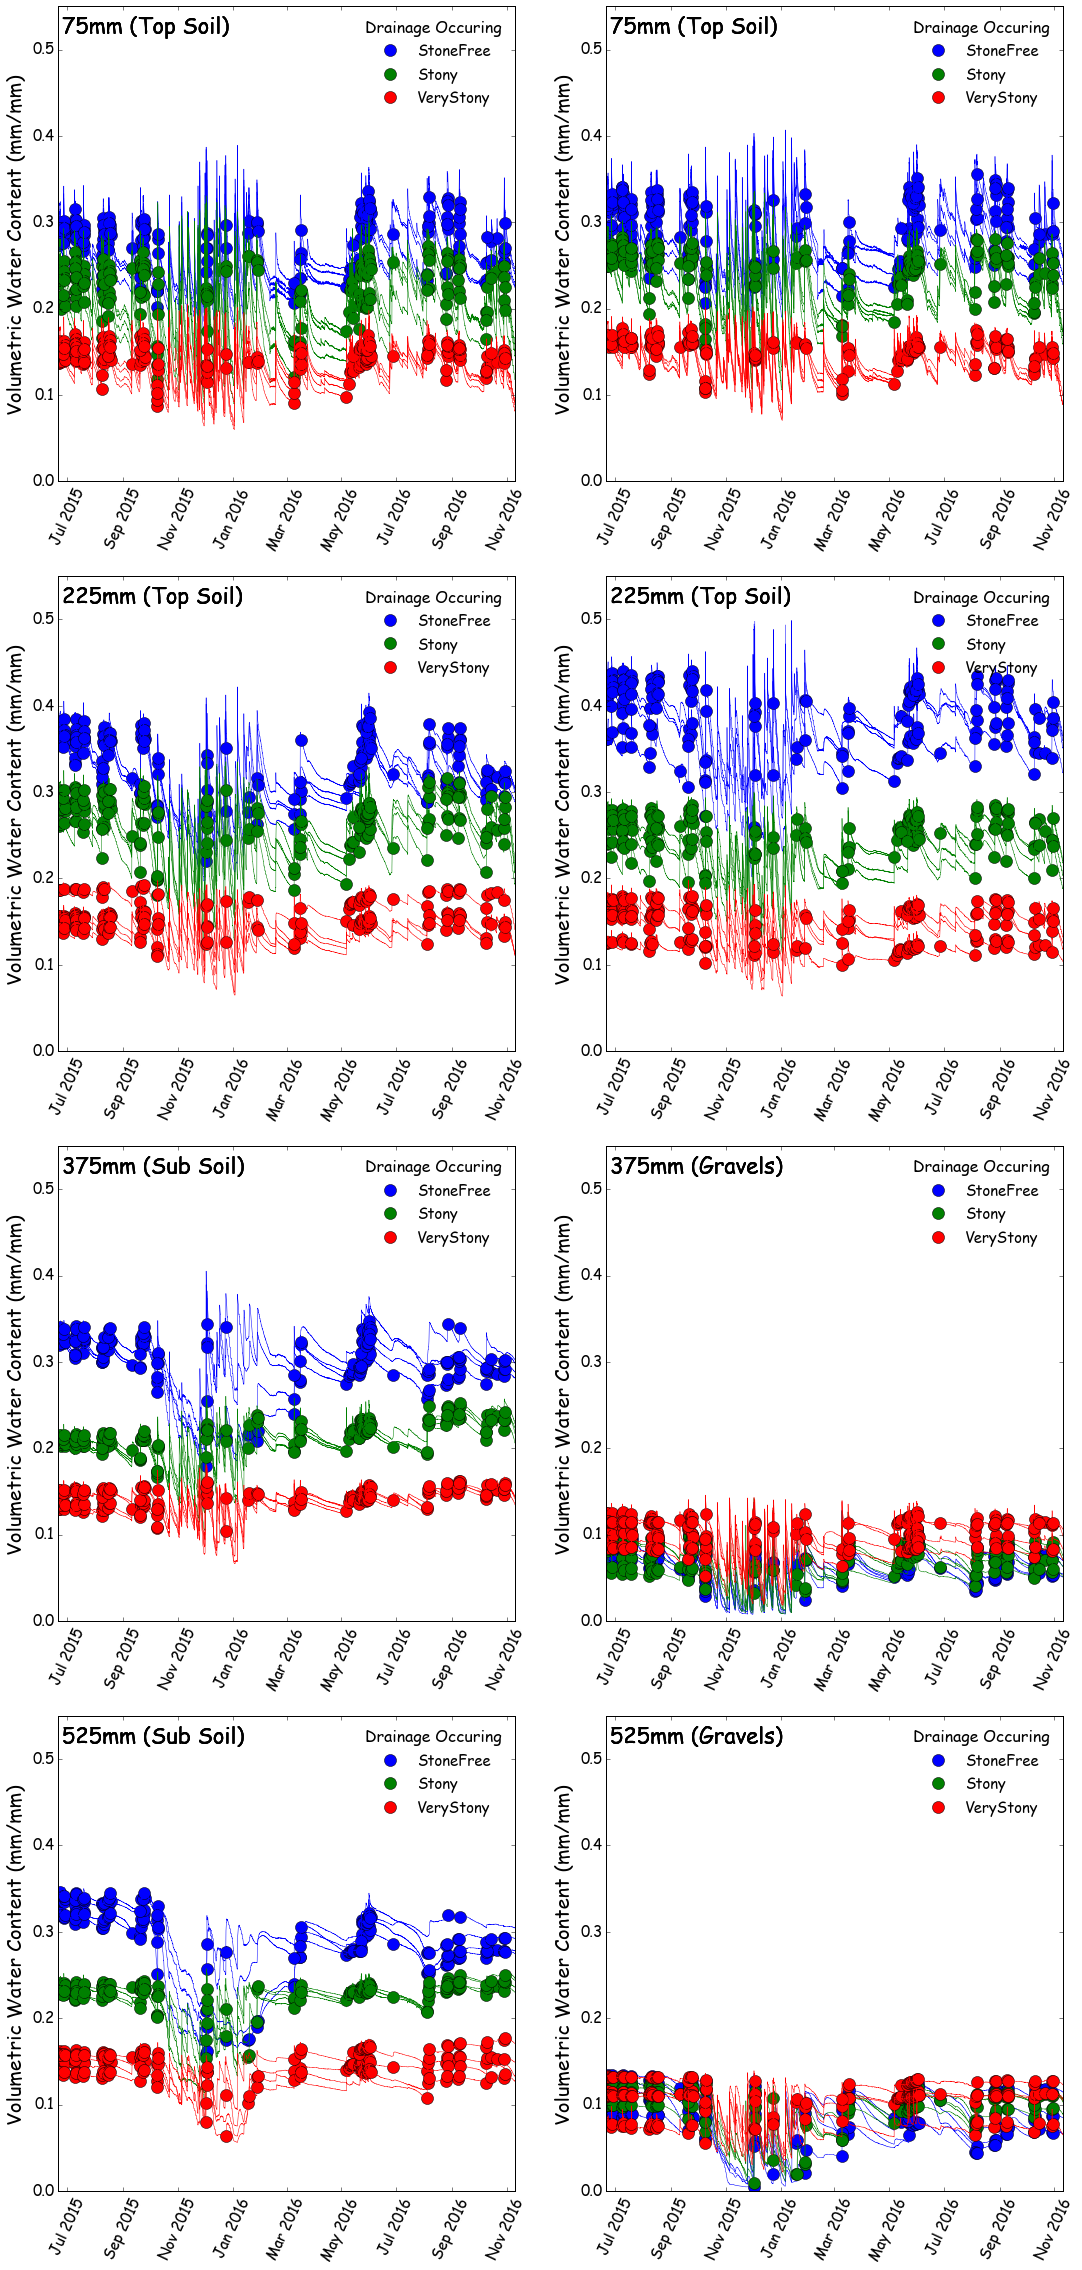

In [72]:
#axSWC = Data.ix['2015-06-19':,:].resample('H').min() #'2016-03-28'
#MaxSWC.columns = MaxSWC.columns.swaplevel('Column','Block')
for X in range(0,96):
    column = MaxSWC.ix[:,X].name[3]
    DrainageMask = Drainage.ix[MaxSWC.index,Drainage.columns.isin([column],level='Column')].ix[:,0]
    MaxSWC.ix[:,X].where(DrainageMask>1,np.nan,inplace=True)

Depths = ['D1','D2','D3','D4']
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']
MeanDepths = ['75mm','225mm','375mm','525mm']
Horizons = ['Top Soil', 'Top Soil', 'Top Soil','Top Soil','Sub Soil', 'Gravels','Sub Soil', 'Gravels']

Graph = plt.figure(figsize=(18,80))

Pos = 1
DepthPos = 0
for Depth in Depths:    
    for Grav in Gravels:
        fig = Graph.add_subplot(8,2,Pos)
        StonPos = 0
        for Ston in Stones:
            Labels = [Ston,None,None,None]
            Blocklevel=0
            for Block in ['1','2','3','4']:
                plt.plot(MaxSWC.ix[:,(Depth,Grav,Ston,Block)].index,MaxSWC.ix[:,(Depth,Grav,Ston,Block)],
                         'o',
                         markersize=12,
                         color=colors[StonPos],
                         label = Labels[Blocklevel])
                plt.plot(Data.ix['2015-06-19':,:].index,Data.ix['2015-06-19':,(Depth,Grav,Ston,Block)],
                        linewidth=0.5,
                         color=colors[StonPos],)
                Blocklevel+=1
            StonPos += 1
            plt.text('2015-06-25',0.52,MeanDepths[DepthPos] + ' (' +Horizons[Pos-1] +')', fontsize=22)
        Pos +=1
        plt.ylim(0,0.55)
        plt.ylabel('Volumetric Water Content (mm/mm)', fontsize=20)
        plt.xticks(rotation=65)
        plt.tick_params(labelsize=15)    
        ledg = plt.legend(loc=1,numpoints=1,fontsize = 15,title='Drainage Occuring')
        ledg.get_title().set_fontsize('16')
    DepthPos +=1
plt.tight_layout

In [65]:
MaxSWC.ix[:'2015-10-01',(Depth,Grav,Ston)].median().mean()

0.11174710774708715

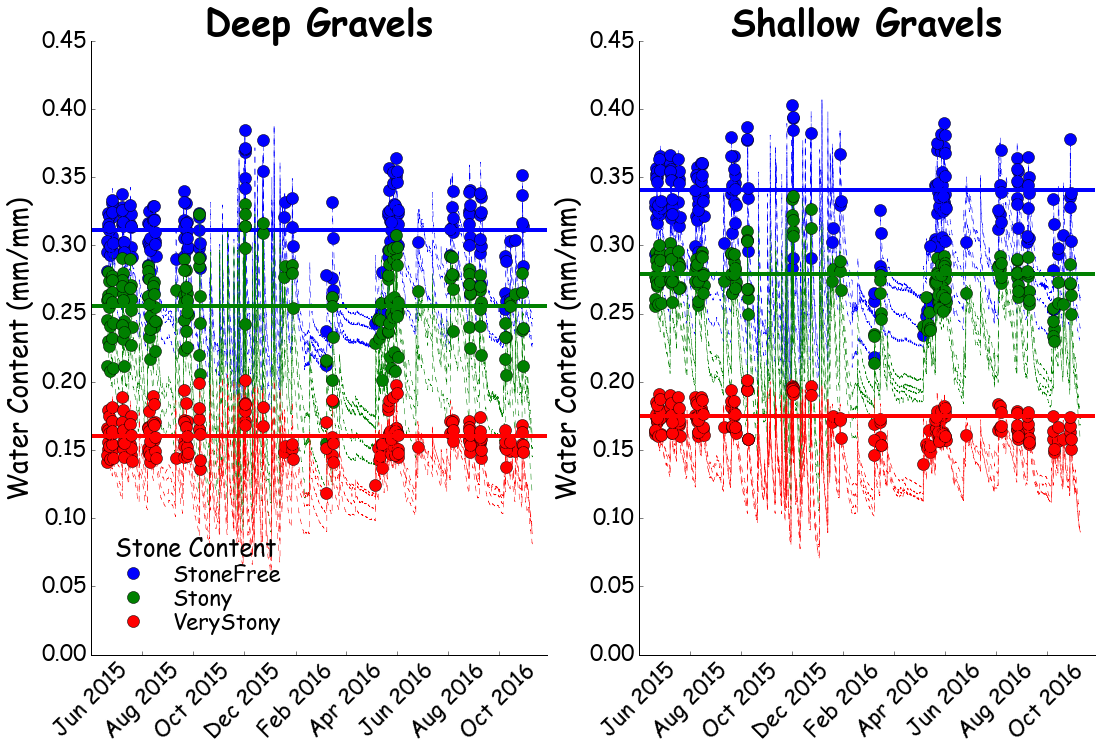

In [77]:
MaxSWC = Data.ix['2015-06-19':,:].resample('D').max()
#MaxSWC.columns = MaxSWC.columns.swaplevel('Column','Block')
for X in range(0,96):
    column = MaxSWC.ix[:,X].name[3]
    DrainageMask = Drainage.ix[MaxSWC.index,Drainage.columns.isin([column],level='Column')].ix[:,0]
    MaxSWC.ix[:,X].where(DrainageMask>1,np.nan,inplace=True)

Depths = ['D1']
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']
MeanDepths = ['75mm','225mm','375mm','525mm']
Horizons = ['Top Soil', 'Top Soil', 'Top Soil','Top Soil','Sub Soil', 'Gravels','Sub Soil', 'Gravels']

Graph = plt.figure(figsize=(18,11))

Pos = 1
DepthPos = 0
for Depth in Depths:    
    for Grav in Gravels:
        fig = Graph.add_subplot(1,2,Pos)
        StonPos = 0
        for Ston in Stones:
            Labels = [Ston,None,None,None]
            Blocklevel=0
            for Block in ['1','2','3','4']:
                plt.plot(MaxSWC.ix[:,(Depth,Grav,Ston,Block)].index,MaxSWC.ix[:,(Depth,Grav,Ston,Block)],
                         'o',
                         markersize=12,
                         color=colors[StonPos],
                         label = Labels[Blocklevel])
                plt.plot(Data.ix['2015-06-19':,:].index,
                         Data.ix['2015-06-19':,(Depth,Grav,Ston,Block)],
                         '--',
                         linewidth=0.5,
                         color=colors[StonPos])
                
                Blocklevel+=1
            Base = MaxSWC.ix[:'2015-10-01',(Depth,Grav,Ston)].median().mean()
            plt.plot(['2015-06-01','2016-11-28'],[Base,Base],'-',color=colors[StonPos],linewidth=4)                            
            StonPos += 1
            plt.title(Grav+' Gravels', fontsize=36, weight='bold')
            #plt.text('2015-06-25',0.52,MeanDepths[DepthPos] + ' (' +Horizons[Pos-1] +')', fontsize=22)
        Pos +=1
        plt.ylim(0,0.45)
        plt.xlim('2015-06-01','2016-11-28')
        plt.ylabel('Water Content (mm/mm)', fontsize=26)
        plt.xticks(rotation=45)
        plt.tick_params(labelsize=22)    
        if Grav == 'Deep':
            ledg = plt.legend(loc=3,numpoints=1,fontsize = 22,title='Stone Content',labelspacing = 0.05)
            ledg.get_title().set_fontsize('24')
        fig.spines['right'].set_visible(False)
        fig.spines['top'].set_visible(False)
        fig.yaxis.set_ticks_position('left')
        fig.xaxis.set_ticks_position('bottom')
    DepthPos +=1
plt.tight_layout
plt.savefig('DrainVWC.jpg',dpi=400)

<function matplotlib.pyplot.tight_layout>

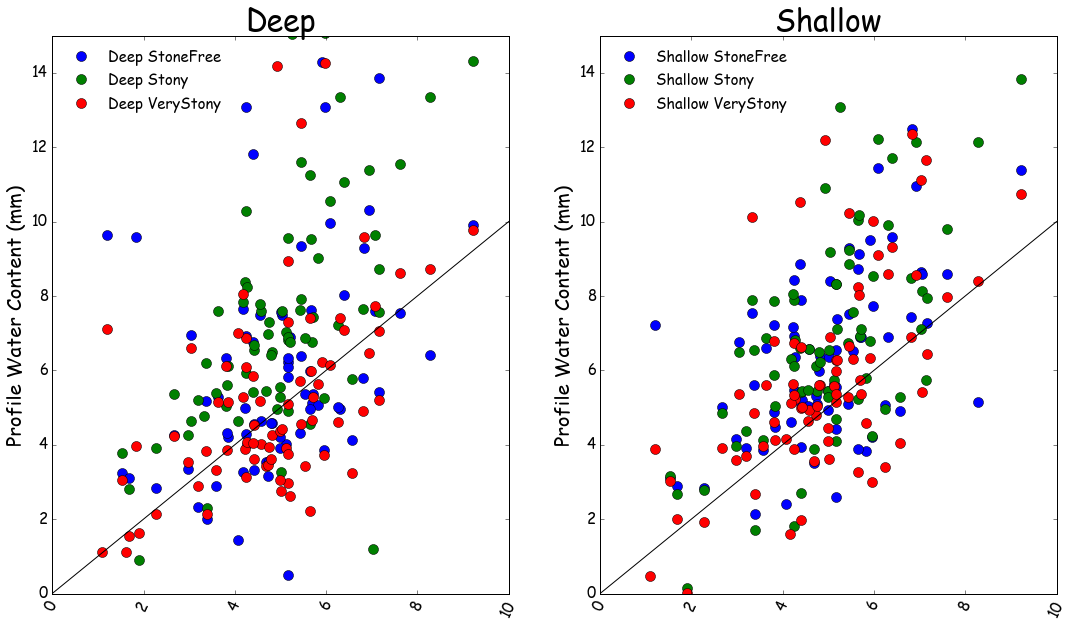

In [67]:
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']

Graph = plt.figure(figsize=(18,10))

WaterUseDailyMeans = WaterUseDaily.groupby(level=['Gravels', 'Stones'],axis=1).mean()

GravPos = 0
for Grav in Gravels:
    fig = Graph.add_subplot(1,2,GravPos+1)
    StonPos = 0
    for Ston in Stones:
        plt.plot(MetData.ix['2015-11-1':'2016-01-20','ET'],WaterUseDailyMeans.ix['2015-11-1':'2016-01-20',(Grav,Ston)],
                 'o',
                 markersize=10,
                 color=colors[StonPos],
                 label = Grav+' ' +Ston)
        StonPos += 1
        plt.title(Grav, fontsize=30)
    GravPos +=1
    plt.ylim(0,15)
    plt.ylabel('Profile Water Content (mm)', fontsize=20)
    plt.xticks(rotation=65)
    plt.tick_params(labelsize=15)    
    plt.legend(loc=2,numpoints=1,fontsize = 15)
    plt.plot([0,10],[0,10],'-',color='k')
plt.tight_layout

##Calculate Water Extraction Rate (WER) each day and graph

In [68]:
#Water Extraction Rate is the proportion of plant available water that is extracted each day so calculated as the difference between 
#RPAW each day
#Calculate Rate
WER = RPAW.ix['2015-06-19':,:].diff() * -1
#Throw away values that are ridiculiously high rates
WER.where(RPAW.ix['2015-06-19':,:]<0.98,np.nan,inplace=True)
#Throw away any data where rates are negative, water recharge is occuring
WER.where(WER>0,np.nan,inplace=True)
#Agregate to daily values
DailyWER = WER.resample('D', how ='sum')
#Remove any data where drainage was occuring
DrainageMask = pd.read_pickle('.\Dataframes\DrainageMask')
DailyWER.where(DrainageMask!=np.nan,np.nan)
#Drop data when canopy cover was less than 80%
DailyWER = DailyWER.ix['2015-11-1':'2016-01-20',:]

Depths = ['D1','D2','D3','D4']
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']

Graph = plt.figure(figsize=(18,60))

Pos = 1
for Depth in Depths:    
    for Grav in Gravels:
        fig = Graph.add_subplot(8,2,Pos)
        StonPos = 0
        for Ston in Stones:
            median = DailyWER.ix[:,(Depth,Grav,Ston)].median(axis=1)
            plt.plot(MetData.ix[median.index,'ET'],median,'o',color=colors[StonPos],
                     markersize = 15,
                     label = Grav+' ' +Ston)
            StonPos += 1
            plt.title(Grav, fontsize=30)
        Pos +=1
        plt.ylim(0,0.4)
        plt.ylabel('Extraction Rate (/d)', fontsize=20)
        plt.xticks(rotation=65)
        plt.tick_params(labelsize=15)    
        #plt.legend(loc=2,numpoints=1,fontsize = 15)
plt.tight_layout

C:\Users\cflhxb\AppData\Roaming\Python\Python27\site-packages\ipykernel\__main__.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


NotImplementedError: merging with more than one level overlap on a multi-index is not implemented

In [ ]:
TreatComb_tup = [('D1','Deep','StoneFree'),
('D1','Deep','Stony'),
('D1','Deep','VeryStony'),
('D1','Shallow','StoneFree'),
('D1','Shallow','Stony'),
('D1','Shallow','VeryStony'),
('D2','Deep','StoneFree'),
('D2','Deep','Stony'),
('D2','Deep','VeryStony'),
('D2','Shallow','StoneFree'),
('D2','Shallow','Stony'),
('D2','Shallow','VeryStony'),
('D3','Deep','StoneFree'),
('D3','Deep','Stony'),
('D3','Deep','VeryStony'),
('D3','Shallow','StoneFree'),
('D3','Shallow','Stony'),
('D3','Shallow','VeryStony'),
('D4','Deep','StoneFree'),
('D4','Deep','Stony'),
('D4','Deep','VeryStony'),
('D4','Shallow','StoneFree'),
('D4','Shallow','Stony'),
('D4','Shallow','VeryStony')]

TreatCombs = pd.MultiIndex.from_tuples(TreatComb_tup,names=('Depth','Gravels','Stones'))

KLparamFits = pd.DataFrame(index = TreatCombs, columns = ['Klmax','Klo'])

##Interpreting Water Extraction rates
There is daily variation in WER within each layer.  This is because on many days water extraction is limited by atmospherid demand.  It is the maximimum (excluding some outlyers) that represents the potential water extraction rate (kl) given by the soil hydraulic conductivity (k) and the crop root length density (l).

To calculate kl we will take the 80th percentile of WER for each layer

##Calculate kl values for each treatment and graph

In [ ]:
DailyWER.columns = DailyWER.columns.swaplevel('Sensor','Depth')
DailyWER.dropna(inplace = True)

kl = pd.DataFrame(columns = Data.columns.swaplevel('Sensor','Depth'))

for X in range (1,97): 
    SensorRef = 'S_' + np.str(X)
    kl.ix['kl',SensorRef] = np.percentile(DailyWER.ix[MetData.ix[DailyWER[SensorRef].index,'ET']>6,SensorRef],50)

DailyWER.columns = DailyWER.columns.swaplevel('Sensor','Depth')
#For some reason the above opperation makes numbers into object types so need to convert them to floats.
kl = kl.astype(float)   

#Calculate means
klMeans = kl.groupby(level=['Gravels','Stones','Depth'],axis=1).mean()
#turn the index columns into data so it can be graphed
kltranspose = klMeans.transpose()

In [ ]:
#Fig = plt.figure(figsize=(10,10))
#plt.plot(kltranspose.index,kltranspose.ix[('Deep','StoneFree')])
w = 4
depth = [75,225,375,525]
Fig = plt.figure(figsize=(10,7))
plt.plot(depth,kltranspose.ix[('Deep','StoneFree')].values,'b-', label='Deep StoneFree', linewidth = w)
plt.plot(depth,kltranspose.ix[('Deep','Stony')].values,'g-', label='Deep Stoney', linewidth = w)
plt.plot(depth,kltranspose.ix[('Deep','VeryStony')].values,'r-', label='Deep Very Stony', linewidth = w)
plt.plot(depth,kltranspose.ix[('Shallow','StoneFree')].values,'b--', label='Shallow StoneFree', linewidth = w)
plt.plot(depth,kltranspose.ix[('Shallow','Stony')].values,'g--', label='Shallow Stony', linewidth = w)
plt.plot(depth,kltranspose.ix[('Shallow','VeryStony')].values,'r--', label='Shallow VeryStoney', linewidth = w)
plt.legend(loc=1, fontsize=16, ncol=2)
plt.ylabel('Extraction rate (/d)', fontsize=30);
plt.xlabel('Depth (mm)', fontsize=30);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,0.3)


In [ ]:
Depths = ['D1','D2','D3','D4']
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']

newone =  kltranspose.copy()

newone.ix['Shallow','kl'] = np.nan

for Gra in Gravels:
    for Sto in Stones:
        for Dep in Depths:
            if ((Dep == 'D1') | (Dep == 'D2')) & (Gra == 'Deep'):
                    newone.ix[(Gra,Sto,Dep),'kl'] = (kltranspose.ix[('Deep',Sto,Dep),'kl'] + \
                                                 kltranspose.ix[('Shallow',Sto,Dep),'kl'])/2 
            if ((Dep == 'D1') | (Dep == 'D2')) & (Gra == 'Shallow'):
                newone.ix[('Gravel','Gravel',Dep)] = np.nan
            if((Dep == 'D3') | (Dep == 'D4')) & (Gra == 'Shallow'):
                newone.ix[('Gravel','Gravel',Dep)] =(kltranspose.ix[('Shallow','StoneFree',Dep),'kl'] + \
                                                     kltranspose.ix[('Shallow','Stony',Dep),'kl'] + \
                                                     kltranspose.ix[('Shallow','VeryStony',Dep),'kl'])/3 
                

In [ ]:
newone

In [ ]:
#Fig = plt.figure(figsize=(10,10))
#plt.plot(kltranspose.index,kltranspose.ix[('Deep','StoneFree')])
w = 4
depth = [75,225,375,525]
Fig = plt.figure(figsize=(10,7))
plt.plot(depth,newone.ix[('Deep','StoneFree')].values,'b-', label='Stone Free', linewidth = w)
plt.plot(depth,newone.ix[('Deep','Stony')].values,'g-', label='Stony', linewidth = w)
plt.plot(depth,newone.ix[('Deep','VeryStony')].values,'r-', label='Very Stony', linewidth = w)
plt.plot(depth,newone.ix[('Gravel','Gravel')].values,'k-', label='Gravel', linewidth = w)
plt.legend(loc=1, fontsize=16, ncol=2)
plt.ylabel('Maximum extraction rate (/d)', fontsize=24);
plt.xlabel('Depth (mm)', fontsize=24);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,0.25)
plt.savefig('kl.jpg',dpi=400)

In [ ]:
klRO = kl.swaplevel('Block','Sensor',axis=1)
klRO = klRO.transpose()
klRO = klRO.sort()
klRO = klRO.transpose()

Depths = ['D1','D2','D3','D4']
TreatComb_tup = [('1','Deep','StoneFree'),
('1','Deep','Stony'),
('1','Deep','VeryStony'),
('1','Shallow','StoneFree'),
('1','Shallow','Stony'),
('1','Shallow','VeryStony'),
('2','Deep','StoneFree'),
('2','Deep','Stony'),
('2','Deep','VeryStony'),
('2','Shallow','StoneFree'),
('2','Shallow','Stony'),
('2','Shallow','VeryStony'),
('3','Deep','StoneFree'),
('3','Deep','Stony'),
('3','Deep','VeryStony'),
('3','Shallow','StoneFree'),
('3','Shallow','Stony'),
('3','Shallow','VeryStony'),
('4','Deep','StoneFree'),
('4','Deep','Stony'),
('4','Deep','VeryStony'),
('4','Shallow','StoneFree'),
('4','Shallow','Stony'),
('4','Shallow','VeryStony')]

TreatCombs = pd.MultiIndex.from_tuples(TreatComb_tup,names=('Block','Gravels','Stones'))

klstack = pd.DataFrame(index = Depths, columns = TreatCombs)

klstack.ix['D1',:] = klRO.ix[:,klRO.columns.isin(['D1'],level='Depth')].values[0]
klstack.ix['D2',:] = klRO.ix[:,klRO.columns.isin(['D2'],level='Depth')].values[0]
klstack.ix['D3',:] = klRO.ix[:,klRO.columns.isin(['D3'],level='Depth')].values[0]
klstack.ix['D4',:] = klRO.ix[:,klRO.columns.isin(['D4'],level='Depth')].values[0]
klstack = klstack.swaplevel('Block','Gravels',axis=1)
klstack = klstack.swaplevel('Block','Stones',axis=1)

In [ ]:
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']
depth = [75,225,375,525]

Graph = plt.figure(figsize=(20,20))

Pos = 1
for Grav in Gravels:
    fig = Graph.add_subplot(2,2,Pos)
    StonPos = 0
    for Ston in Stones:
        median = klstack.ix[:,(Grav,Ston)].median(axis=1)
        SEM = klstack.ix[:,(Grav,Ston)].std(axis=1)/np.sqrt(4)
        Upper = median + SEM
        Lower = median - SEM
        plt.fill_between(depth,
                 Upper,
                 Lower,
                 color = colors[StonPos],alpha=0.25)
        plt.plot(depth,median,color=colors[StonPos],
                 linewidth = 5,
                 label = Grav+' ' +Ston)
        StonPos += 1
        plt.title(Grav, fontsize=30)
    Pos +=1
    plt.ylim(0,0.3)
    plt.ylabel('Available Water (mm/mm)', fontsize=20)
    plt.xticks(rotation=65)
    plt.tick_params(labelsize=15)    
    #plt.legend(loc=2,numpoints=1,fontsize = 15)
plt.tight_layout

In [ ]:
#Define function to be fit
Exponental = fitter.models.ExpressionModel('Klmax - Klmax * exp(x * -Klo)')  #Exponential curve

Fig = plt.figure(figsize=(18, 80))
    
#Fit curve to upper envelope of data to give potential yield model
Depths = ['D1','D2','D3','D4']
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']

Graph = plt.figure(figsize=(18,60))

Pos = 1
for Depth in Depths:    
    for Grav in Gravels:
        StonPos = 0
        for Ston in Stones:
            fig = Graph.add_subplot(24,2,Pos)
            #Setup x and y arrays
            y = DailyWER.ix['2015-11-1':'2016-01-20',(Depth,Grav,Ston)].median(axis=1)
            x = MetData.ix[y.index,'ET']
            xplot = x.drop_duplicates()
            xplot.sort()
            

            #Define function to be fit
            Exponental = fitter.models.ExpressionModel('Klmax - Klmax * exp(x * Klo)')  #Exponential curve
            pctle95 = np.percentile(y,95)
            pctle85 = np.percentile(y,85)
            pctle75 = np.percentile(y,75)
            p = fitter.Parameters()
            p.add_many(('Klmax',pctle85,True,pctle75,pctle95,None),
                       ('Klo',-0.3,True,-2,-.01,None))
            
            #fit model
            yBestFit = Exponental.fit(y, p, x=x)
            yplotBest = Exponental.eval(yBestFit.params,x=xplot)

            #calculating weightings
            residuals = pd.Series(yBestFit.residual)
            Weightings = residuals.where(residuals<0.0,0).copy()
            Weightings2 = np.asarray(Weightings)

            #Recrank fitting with weighting toward upper threshold
            yUpperFit = Exponental.fit(y, p, x=x, weights = Weightings2) 
            yplotUpper = Exponental.eval(yUpperFit.params,x=xplot)
            
            plt.plot(MetData.ix[y.index,'ET'],y,'o',color=colors[StonPos],
                     markersize = 15,
                     label = Grav+' ' +Ston)
            plt.title(Grav, fontsize=30)
            plt.plot(xplot,yplotBest,'-',color='g',linewidth = 4)
            plt.plot(xplot,yplotUpper,'-',color='r',linewidth = 4)
            plt.ylim(0,0.4)
            plt.ylabel('Extraction Rate (/d)', fontsize=20)
            plt.xticks(rotation=65)
            plt.tick_params(labelsize=15)    
            Pos +=1
            StonPos += 1
            KLparamFits.ix[(Depth,Grav,Ston),:] = pd.Series(yBestFit.best_values)

In [ ]:
#'Klmax - Klmax * exp(x * -Klo)'

#negKlo = np.multiply(-1,KLparamFits.ix[:,'Klo'].values)
xKlo = np.multiply(7,KLparamFits.ix[:,'Klo'].values)
expxKlo = np.exp(np.float64(xKlo)) 
right = np.multiply(expxKlo,KLparamFits.ix[:,'Klmax'].values)
kl7mm = np.subtract(KLparamFits.ix[:,'Klmax'].values,right)
KLparamFits.ix[:,'Kl7mm'] = kl7mm

In [ ]:
#Plot kl valuse calculated with fitting method
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']

Graph = plt.figure(figsize=(18,10))

GravPos = 0
for Grav in Gravels:
    GravelSelect = KLparamFits.index.isin([Grav],level='Gravels')
    StonPos=0
    for Ston in Stones:
        StoneSelect = KLparamFits.index.isin([Ston],level='Stones')
        #Create a boolean mask for flitering current data out of DataFrame
        mask = [all(tup) for tup in zip(StoneSelect, GravelSelect)]
        y = KLparamFits.ix[mask,'Kl7mm']
        x = KLparamFits.ix[mask,'Kl7mm'].index
        plt.plot(y,lines[GravPos],color=colors[StonPos])
        StonPos +=1
    GravPos +=1

##Now lets look at the leaching data

In [ ]:
NLeachData = pd.DataFrame(index=NConcData.index, columns =NConcData.columns)
for col in NLeachData.ix[:,'NO3'].columns:
    col0=('NO3',col[0],col[1],col[2])
    col1=('NH4',col[0],col[1],col[2])
    NLeachData.ix[:,col0] = NConcData.ix[:,'NO3'].ix[:,col].astype(float).values
    NLeachData.ix[:,col1] = NConcData.ix[:,'NH4'].ix[:,col].astype(float).values
    col2=('TotalN',col[0],col[1],col[2])
    NLeachData.ix[:,col2] = np.add(NLeachData.ix[:,'NO3'].ix[:,col],
                                  NLeachData.ix[:,'NH4'].ix[:,col])

Drainage2 = Drainage
Drainage2.columns = Drainage2.columns.swaplevel('Column','Block')
NMeasuretimestamps = NLeachData.index.tolist()
NMeasureDates =  []
for x in NMeasuretimestamps:
    NMeasureDates.append(np.datetime64(x))

In [ ]:
for Col in NLeachData.ix[:,'NO3']:
    LastDate=datetime.date(2015,06,19)
    AccumDrain = Drainage.ix[:,'Drainage'].ix[:,Col].cumsum()
    DrainTots=[0] # Put zero value in for start date
    LeachTots=[0]
    for CurrentDate in NMeasureDates[1:]:
        drain = AccumDrain.ix[CurrentDate,:].values[0] - AccumDrain.ix[LastDate,:].values[0]
        Col1=('NO3',Col[0],Col[1],Col[2])
        leach = drain *  NLeachData.ix[CurrentDate,Col1] # Leaching in ng/m2 (ng/l * l/m2[which is what mm are])
        leach = np.divide(leach,100) #convert to kg/ha
        DrainTots.append(drain)   
        LeachTots.append(leach)
        LastDate = CurrentDate
    Col2=('Drain',Col[0],Col[1],Col[2])
    Col3=('NLeach',Col[0],Col[1],Col[2])
    NLeachData.ix[:,Col2] = DrainTots
    NLeachData.ix[:,Col3] = LeachTots

In [ ]:
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']

Graph = plt.figure(figsize=(18,11))

GravPos = 0
for Grav in Gravels:
    fig = Graph.add_subplot(1,2,GravPos+1)
    StonPos = 0
    for Ston in Stones:
        median = NLeachData.ix['2015-10-01':,('NLeach',Grav,Ston)].cumsum().median(axis=1)
        SEM = NLeachData.ix['2015-10-01':,('NLeach',Grav,Ston)].cumsum().std(axis=1)/np.sqrt(4)
        Upper = median + SEM
        Lower = median - SEM
        plt.fill_between(NLeachData.ix['2015-10-01':,('NLeach',Grav,Ston)].index,
                 Upper,
                 Lower,
                 color = colors[StonPos],alpha=0.25)
        plt.plot(NLeachData.ix['2015-10-01':,('NLeach',Grav,Ston)].index,median,color=colors[StonPos],
                 linewidth = 4,
                 label = Ston)
        StonPos += 1
        plt.title(Grav + ' Gravels', fontsize=36, weight='bold')
        fig.spines['right'].set_visible(False)
        fig.spines['top'].set_visible(False)
        fig.yaxis.set_ticks_position('left')
        fig.xaxis.set_ticks_position('bottom')
    GravPos +=1
    plt.ylim(0,20)
    plt.xlim('2015-10-01','2016-02-02')
    plt.ylabel('Profile Water Content (mm)', fontsize=26, weight='bold')
    plt.xticks(rotation=45)
    plt.tick_params(labelsize=22)    
    if GravPos ==1:
        ledg = plt.legend(loc=2,numpoints=1,fontsize = 24,labelspacing = 0.05, 
                          title='Stone Content')
        ledg.get_title().set_fontsize(28)
        ledg.get_title().set_weight('bold')
plt.tight_layout
plt.savefig('SWD.jpg',dpi=400)

In [ ]:
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']
lines = ['-','--']
colors = ['b','g','r']

Graph = plt.figure(figsize=(18,11))

GravPos = 0
for Grav in Gravels:
    fig = Graph.add_subplot(1,2,GravPos+1)
    StonPos = 0
    for Ston in Stones:
        median = NLeachData.ix[:,('NO3',Grav,Ston)].median(axis=1)
        SEM = NLeachData.ix[:,('NO3',Grav,Ston)].std(axis=1)/np.sqrt(4)
        Upper = median + SEM
        Lower = median - SEM
        plt.fill_between(NLeachData.ix[:,('NLeach',Grav,Ston)].index,
                 Upper,
                 Lower,
                 color = colors[StonPos],alpha=0.25)
        plt.plot(NLeachData.ix[:,('NLeach',Grav,Ston)].index,median,color=colors[StonPos],
                 linewidth = 4,
                 label = Ston)
        StonPos += 1
        plt.title(Grav + ' Gravels', fontsize=36, weight='bold')
        fig.spines['right'].set_visible(False)
        fig.spines['top'].set_visible(False)
        fig.yaxis.set_ticks_position('left')
        fig.xaxis.set_ticks_position('bottom')
    GravPos +=1
    plt.ylim(0,80)
    plt.ylabel('Profile Water Content (mm)', fontsize=26, weight='bold')
    plt.xticks(rotation=45)
    plt.tick_params(labelsize=22)    
    if GravPos ==2:
        ledg = plt.legend(loc=1,numpoints=1,fontsize = 24,labelspacing = 0.05, 
                          title='Stone Content')
        ledg.get_title().set_fontsize(28)
        ledg.get_title().set_weight('bold')
plt.tight_layout
plt.savefig('SWD.jpg',dpi=400)

In [ ]:
NLeachData